# Regresión logistica

La regresión lineal que se ha discitido anteriormente, asume que la salida de nuestro modelo es cuantitativa; no obstante en multiples situaciones la variable de salida o variable de respuesta que tenemos puede ***cualitativa***. Por ejemplo, el color de ojos, el diagnostico de una enfermedad, la aprobación de un crédito; es decir tenemos distintas variables ***categoricas***.

EL proceso mediante el cual se hace una predicción de alguna categoria o variable cualitativa, se le conoce como proceso de clasificación; donde, dada unas entradas observadas, se introducen  a un modelo, el cual asigna la observación a una categoría o a una clase en especifico.

Por otro lado, a menudo los métodos utilizados para la clasificación predicen primero la probabilidad de que la observación pertenezca a cada una de las categorías de una variable cualitativa, como base para realizar la clasificación. En este sentido también se comportan como métodos de regresión.

**Descripción general de los problemas de clasificación**


Los problemas de clasificación ocurren con más frecuencia de lo que la gente cree, p. ej.:

  1. Dado una serie de sintomás, un médico tendrá que diagnósticar a esa persona, considerando que existen $3$ enfermedades que cuentan con sintomas similares; por ello el médico se encuentra ante un problema de clasificación, ¿cuál será el diagnóstico adecuad? ¿cuál es la enfermedad que tiene la persona?
  2. Imaginemos que un baco ofrece servicios de banca en linea, y el banco se encuentra ante la situación donde una seri de transacciones que parecen fuera de lo normal, son operaciones fraudulentes u operaciones corrientes. Para ello el banco puede usar información del usuario, como la dirección IP, el historial de transacciones anteriores, entre otras características.
  3. AHora imaginemos que un cientifico biologo tiene una base de datos donde ha identificado ciertas mutaciones del ADN, identificando incluso a pacientes con y sin una enfermedad, y el quiere determinar que mutaciones del ADN son perjudiciales (causantes de enfermedades) y cuales no son perjudiciales.


Ahora, como en todo modelo de aprendizaje aumtomático, nosotros tenemos un conjunto de datos:


$$\mathcal{D} = \{ (\vec{X}_1, y_1), (\vec{X}_2, y_2), \ldots, (\vec{X}_n, y_n) \}$$


donde:

$$\vec{X}=[x_{1}, x_{2}, x_{3}, \ldots, x_{p}]$$

el cual es el vector característico.


¿Por qué no se debe utilizar modelos de regresión lineal en estos casos?

Suponga que deseamos hacer un clasificador para un hospital, el clasificador debe identificar entre diferentes tipos diagnósticos:
 - accidente cerebrovascular
 - sobredosis de drogas
 - ataque epiléptico

Esta información la podemos mapear a variables cuantitativas como sigue; y supongamos que lo ahcemos para trabajarlo con una regresión lineal.

\begin{equation}
Y = \left\{
\begin{array}{l l}
1 & \text{si derrame cerebral;} \\
2 & \text{si sobredosis de drogas;} \\
3 & \text{si convulsión epiléptica.}
\end{array} \right.
\end{equation}


Si aplicamos esto para una regresión lineal, nos encontramos ante un problema porque estamos dandole un orden a estás categorías, y no necesariamente tienen que tener un orden las categorias, solo son ... categorias; por ejemplo, se pueden poner en el siguiente orden, sin ningun problema:

\begin{equation}
Y = \left\{
\begin{array}{l l}
1 & \text{si derrame cerebral;} \\
2 & \text{si convulsión epiléptica;} \\
3 & \text{si sobredosis de drogas}
\end{array} \right.
\end{equation}

Y la regresión lineal, al recibir una entrada, esta ajustará los parámetros considerando ese "orden" inexistente; lo cual podría ser impreciso; no así cuando tenemos el caso de dos clases. P. ej., para el siguiente caso:

\begin{equation}
Y = \left\{
\begin{array}{l l}
0 & \text{si derrame cerebral;} \\
1 & \text{si sobredosis de drogas.}
\end{array} \right.
\end{equation}


En este caso, sin importar el orden, el hecho de usar una regresión lineal tendrá el mismo efecto, y con solo usar la regla de $\hat{Y}>0.5$, podemos decir que pertenece a una clase u otra clase. Por ello en el caso de problemas **binarios** no ha problema si se aplica una regresión lineal; sin embargo, esta estimación que da, no es una probabilidad. Curiosamente los resultados de hacer clasificación con una regresión lineal, son los mismos que se obtienen al aplical Análisis Discriminante Lineal (LDA, por sis siglas en inglés).

En resumen, ¿por qué no se aplica regresión lineal para clasificar?:
 1. Para más de dos clases, la regresión no puede acomodar las respuestas de manera adecuada.
 2. La respeusta de la regresión no es una probabilidad.




**Funcionamiento de la regresión logistica**


La regresión logistica es una extención de la regresión lineal, de hecho, la regresión logistica forma parte de los modelos de regresión lineal generalizados (GLM, por sus siglas en ingles). De hecho, entra como una regresión tipo Binomial, que toma como función liga a la función logistica (o sigmoide). Adentrarnos a la demostración de esto, se encuentra fuera del diplomado, por lo cual nos centraremos más en las ideas clave del modelo, aplicación y evaluación del modelo.

Ahora supongamos que deseamos crear un modelo que clasifique el impago de una persona, por lo cual tenemos dos categorías, "Yes" o "No". Nuestro modelo de regresión logistica lo que hará sera generar una probabilidad que determine si $Y$ pertenece a una clase y otra clase. La manera en que modelamos la entrada es usando variables *dummies* como se muestra a continuación:

\begin{equation}
Y = \left\{
\begin{array}{l l}
0 & \text{si "No";} \\
1 & \text{si "Yes".}
\end{array} \right.
\end{equation}



Ahora, ¿cómo modelamos nuestra probabilidad?

$$Pr(\text{default}=\text{Yes} \mid \text{balance} ) $$

donde "default" es si ha entrado en un impago o no, y "balance" es el saldo de deuda que tiene la persona en su estado de cuenta. Para fines prácticos, lo vamos a resumir así $p(\text{balance})$, la cual tiene un rango entre $0$ y $1$.

Veamos como se ven los datos si hacemos una regresión lineal para estimar este caso.

Este conjunto de datos es el que utilizaremos para crear nuestro clasificador. Ahora, avanzando a más técnicas de aprendizaje automático, nosotros queremos construir un modelo de aprendizaje automático que no solo haga una clasificación adecuada con **datos de entrenamiento**, sino también con **datos de prueba**.


Para esta actividad se trabajará con una base de datos sintética sobre impagos de trajetas de crédito proveída por ISLP.

In [1]:
! pip install ISLP
from ISLP import load_data

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 881.7 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl

In [2]:
Default = load_data('Default')
display(Default.head())


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
Default.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [4]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


Dataset
Un conjunto de datos simulados que contiene información sobre diez mil clientes. El objetivo aquí es predecir qué clientes incumplirán con su deuda de tarjeta de crédito.
Variables
 - default: Un factor con niveles 'No' y 'Yes' que indica si el cliente incumplió su deuda.
 - student: Un factor con niveles 'No' y 'Yes' que indica si el cliente es estudiante.
 - balance: El saldo promedio que el cliente tiene restante en su tarjeta de crédito después de realizar su pago mensual.
 - income: Ingresos del cliente.


Vamos a graficar primero nuestros datos y crear nuestras variables *dummies*. Existen diferentes maneras, pero para nuestro caso solo vamos a utilizar una función creada por nostros.

In [5]:
set(Default['default'])

{'No', 'Yes'}

In [6]:
variables = set(Default['default'])
print(variables)

{'No', 'Yes'}


In [7]:
# Creamos un diccionario que utilziaremos para mapear los valores.
default_dict = {'No': 0, 'Yes': 1}



In [8]:
Default['default_dummies_Yes_No'] = Default['default'].map(default_dict)
Default.head()

,default,student,balance,income,default_dummies_Yes_No
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


In [9]:
Default.tail()

,default,student,balance,income,default_dummies_Yes_No
9995,No,No,711.555020,52992.378914,0
9996,No,No,757.962918,19660.721768,0
9997,No,No,845.411989,58636.156984,0
9998,No,No,1569.009053,36669.112365,0
9999,No,Yes,200.922183,16862.952321,0


In [10]:
# Verificando que los datos para "Yes" default se encuentre bien.
Default.groupby('default').get_group('Yes').head()

<ipython-input-10-c9d0bee21158>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Default.groupby('default').get_group('Yes').head()


,default,student,balance,income,default_dummies_Yes_No
136,Yes,Yes,1486.998122,17854.397028,1
173,Yes,Yes,2205.799521,14271.492253,1
201,Yes,Yes,1774.694223,20359.506086,1
206,Yes,No,1889.599190,48956.171589,1
209,Yes,Yes,1899.390626,20655.200003,1


In [11]:
# Verificando que los datos para "No" default se encuentre bien.
Default.groupby('default').get_group('No').head()

<ipython-input-11-ddb1ba49e5d7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Default.groupby('default').get_group('No').head()


,default,student,balance,income,default_dummies_Yes_No
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


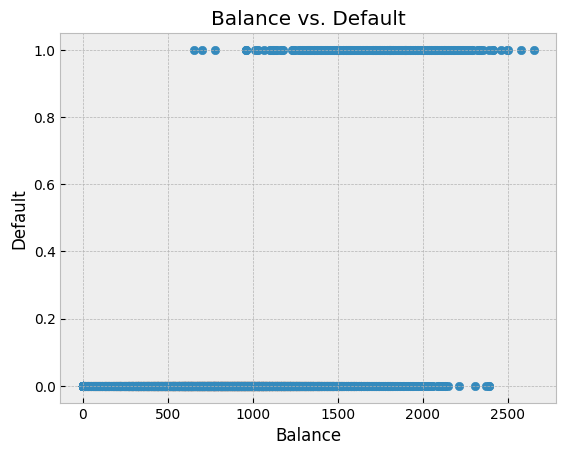

In [ ]:
plt.title("Balance vs. Default")
plt.scatter(Default['balance'], Default['default_dummies_Yes_No'])
plt.xlabel('Balance')
plt.ylabel('Default')
plt.grid(True)
plt.show()

Ahora creamos una regresión lineal con estos datos.

In [12]:
X, y = 1, 2

print(f"X={X}, y={y}")

X=1, y=2


In [13]:
X, y = Default['balance'], Default['default_dummies_Yes_No']
X = sm.add_constant(X)


<ipython-input-14-7abb4992017e>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_line = results.params[0] + results.params[1] * x_line


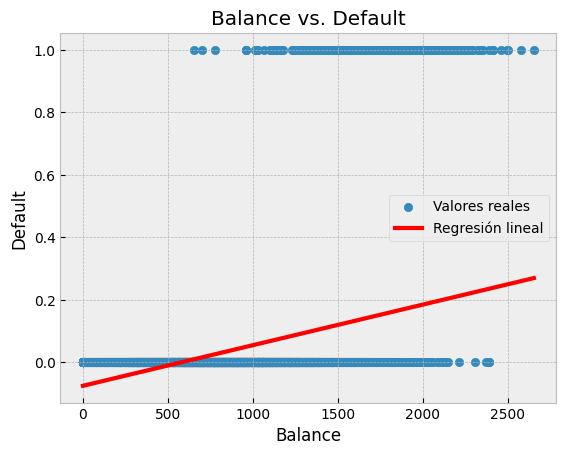

In [14]:
model = sm.OLS(y, X)
results = model.fit()

x_plot = results.predict(X)

x_line = np.linspace(X.values[:,1].min(), X.values[:,1].max(), 100)
y_line = results.params[0] + results.params[1] * x_line


plt.title("Balance vs. Default")
plt.scatter(X.iloc[:,1], y, label="Valores reales")
plt.plot(x_line, y_line, color='red', label='Regresión lineal', linewidth=3)
plt.xlabel('Balance')
plt.ylabel('Default')
plt.legend()
plt.show()

Ahora lo repetimos el proceso con una regresión logistica.

In [15]:
results.params

,0
const,-0.075192
balance,0.000130


Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<ipython-input-16-b72487a917d1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_line =  f_sigmoid(results.params[0] + results.params[1] * x_line)


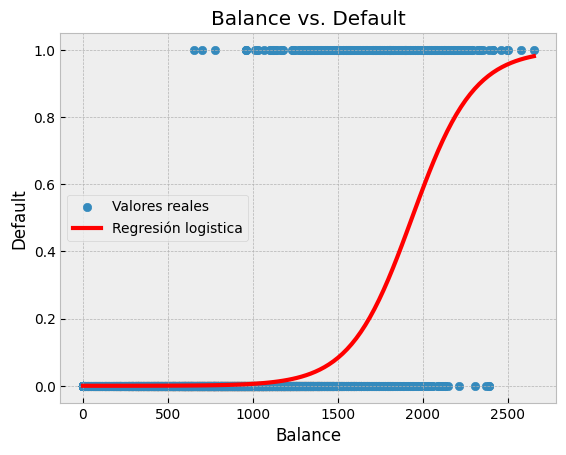

In [16]:
model = sm.Logit(y, X)
results = model.fit()

x_plot = results.predict(X)

x_line = np.linspace(X.values[:,1].min(), X.values[:,1].max(), 100)
f_sigmoid = lambda z: 1 / (1 + np.exp(-z))
y_line =  f_sigmoid(results.params[0] + results.params[1] * x_line)


plt.title("Balance vs. Default")
plt.scatter(X.iloc[:,1], y, label="Valores reales")
plt.plot(x_line, y_line, color='red', label='Regresión logistica', linewidth=3)
plt.xlabel('Balance')
plt.ylabel('Default')
plt.legend()
plt.show()

In [ ]:
def f_sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
umbral = 0.5
x = 0.0000000000000001
p = f_sigmoid(x)
print(f"Probabilidad de entrar el default = {p}")
print(f"Entrar el Default: {p>umbral}")

Probabilidad de entrar el default = 0.5
Entrar el Default: False


In [ ]:
results.params

const     -10.651331
balance     0.005499
dtype: float64

In [ ]:
umbral = 0.6
x = 1500
p = f_sigmoid(results.params[0] + results.params[1] * x)

print(f"Probabilidad de entrar el default = {p}")
print(f"Entrar el Default: {p>umbral}")

Probabilidad de entrar el default = 0.08294762371431255
Entrar el Default: False


<ipython-input-41-12635ef73205>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = f_sigmoid(results.params[0] + results.params[1] * x)


En este caso podemos elegir un punto de corte en el cual decidimos que los valores deprobabilidad mayor que a $0.5$ ($p>0.5$), entran en impago (default).

Ahora, ¿cómo es que genera la predicción la regresión logistica?

Pues bien la regresión logistica hace la predicción usando la función logistica (la cual se conoce en *deep learning* como función sigmoide), la regresión logistica puede mapear cualquier valor de entrada entre $0$ y $1$, esto permite interpretar los valores como probabilidades. La función logistica tiene la siguiente forma.

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

en la regresión logistica $z$, es la suma ponderada de nuestros valores de entrada.

$$z = \beta_0 + \beta_1 \cdot x_1 + \cdots + \beta_p \cdot x_p $$

apartir de ahora, cambiaremos la notación, y le llamaremos a los parámetros $\beta$ como pesos y los denotaremos con $w$; entonces ahora tenemos:

$$z = w_0 + w_1 \cdot x_1 + \cdots + w_p \cdot x_p $$

Ahora empecemos a realizar unas pruebas para ver como funciona la funcipón logistica.

Analicemos como se comporta la función logistica o sigmoide.

**Primero creamos la función.**

In [17]:
# Definimos nuestra función logistica.
def sigmoid(z):
  return 1 / (1 + np.exp(-z))



In [18]:
x_line = np.linspace(-10, 10, 20)
x_line

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

Despues realizamos el plot.

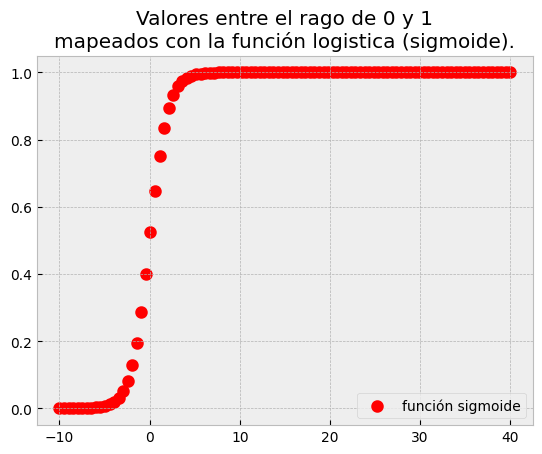

In [19]:
# Generar una serie de numeros que van de -10 a 10
x_line = np.linspace(-10, 40, 100)

# Mapear los numeros
y_line =  sigmoid(x_line)

# Realizar el plot.
plt.title("Valores entre el rago de 0 y 1\nmapeados con la función logistica (sigmoide).")
plt.scatter(x_line, y_line, color='red', label='función sigmoide', linewidth=3)
# plt.xlabel('Balance')
# plt.ylabel('Default')
plt.legend()
plt.show()


Con esta grafica queda como evidencia que todos los valoers que pasan por esta función son mapeados entre el rango de 0 y 1; es por ello que se utiliza para realizar la regresión logistica:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

en la regresión logistica $z$, es la suma ponderada de nuestros valores de entrada, donde:

$$z = w_0 + w_1 \cdot x_1 + \cdots + w_p \cdot x_p $$

donde $\left[ x_1, \ldots, x_p \right]$ es nuestro vector carateristico, y l $W=\left[w_0, \ldots, w_p\right]$ son los pesos o los parámetros de nuestro modelo, luego nuestra $W$ será ajustada con un modelo de aprendizaje (como el método de maxima verosimilitud) para lograr que nuestro modelo logre retornar las probabilidades más adecuadas para nuestro modelo de clasificación.



Entonces nuestro queda del siguiente modo:

$$p(\text{default} \mid X;W) = \frac{1}{1+e^{w_0 + w_1 \cdot \text{balance}}}$$

In [21]:

# Momios**
def odds(p):
  return p / (1 - p)

p = 0.8
odds(p)


4.000000000000001

Con algunas manipulaciones nostros podemos obtener la función odds:

$$odds = \frac{p(X)}{1-p(X)} = e^{w_0 + w_1X}$$

esto nos dice cuantes veces es más prbable que suceda un evento determinado, ese valor peude estar entre $0$ e $\infty$. Los odds se utilizan tradicionalmente en lugar de probabilidades en las carreras de caballos, ya que se relacionan de forma más natural con la estrategia de apuesta correcta. Por ejemplo la probabilidad de que un cabello gane es de $0.2$ entonces el odds ratio nos dice lo siguiente: $\frac{0.2}{1-0.2} = \frac{0.2}{0.8} = \frac{2}{8} = \frac{1}{4}$, entonces la probabilidad de que gane el cabello es $1$ a $4$, donde hay $4$ veces más de que pierda.

Ahora tenemos que:

$$log\left( \frac{p(x)}{1-p(x)} \right) = w_0 + w_1 X$$

donde el lado izquierdo el log de odds o logit, y que al solucionar tenemos que que hay un logit lineal en $X$. Esto nos permite decir que los parámetros de $W$ asociados con cada $X$ pueden tener un efecto positivo sobre las probabilidades, no obstante, esto puede ser complicado de interpretar, por lo cual, podemso optar por analizar los cambios marginales.

Regresemos a nuestro modelo que intenta predecir el impago dado el balance.

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                             Logit Regression Results                             
Dep. Variable:     default_dummies_Yes_No   No. Observations:                10000
Model:                              Logit   Df Residuals:                     9998
Method:                               MLE   Df Model:                            1
Date:                    Thu, 22 Aug 2024   Pseudo R-squ.:                  0.4534
Time:                            00:18:16   Log-Likelihood:                -798.23
converged:                           True   LL-Null:                       -1460.3
Covariance Type:                nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.

<ipython-input-22-bc37e896212f>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_line =  f_sigmoid(results.params[0] + results.params[1] * x_line)


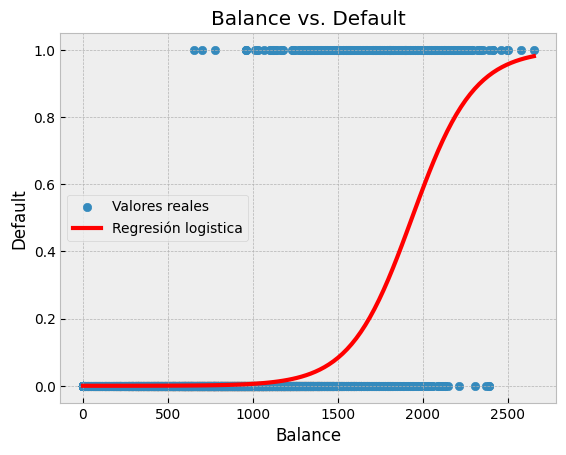

In [22]:
X, y = Default['balance'], Default['default_dummies_Yes_No']
X = sm.add_constant(X)

model = sm.Logit(y, X)
results = model.fit()

print(results.summary())

x_plot = results.predict(X)

x_line = np.linspace(X.values[:,1].min(), X.values[:,1].max(), 100)
f_sigmoid = lambda z: 1 / (1 + np.exp(-z))
y_line =  f_sigmoid(results.params[0] + results.params[1] * x_line)


plt.title("Balance vs. Default")
plt.scatter(X.iloc[:,1], y, label="Valores reales")
plt.plot(x_line, y_line, color='red', label='Regresión logistica', linewidth=3)
plt.xlabel('Balance')
plt.ylabel('Default')
plt.legend()
plt.show()

In [23]:
results.params

,0
const,-10.651331
balance,0.005499


In [24]:
odds = np.exp(results.params)
df = pd.DataFrame({'odds': odds}, index=X.columns[1:])
df.head()

,odds
balance,1.005514


$$odds = \frac{p(X)}{1-p(X)} = e^{w_0 + w_1X}$$

El LLR p-value (Likelihood Ratio Test p-value) en el contexto de la regresión logística indica la significancia estadística del modelo ajustado en comparación con un modelo nulo. Este valor p se calcula utilizando la prueba de razón de verosimilitudes (Likelihood Ratio Test, LLR), que compara la verosimilitud del modelo ajustado con la del modelo nulo para determinar si el modelo ajustado proporciona una mejora significativa en el ajuste.

### Interpretación del LLR p-value:

1. **Valor p pequeño (generalmente $< 0.05$)**: Indica que hay evidencia suficiente para rechazar la hipótesis nula de que el modelo ajustado no es significativamente mejor que el modelo nulo. En otras palabras, el modelo ajustado tiene variables significativas que explican la variabilidad en los datos.

2. **Valor p grande (generalmente $> 0.05$)**: Indica que no hay suficiente evidencia para rechazar la hipótesis nula, lo que sugiere que el modelo ajustado no proporciona una mejora significativa en el ajuste en comparación con el modelo nulo. En este caso, el modelo ajustado podría no ser adecuado para explicar los datos observados.

**En el ejercicio perentes:**

El LLR p-value es de `6.233e-29`. Esta notación científica (`6.233e-29`) significa $ 6.233 \times 10^{-29} $, lo cual indica un valor extremadamente pequeño. Por lo tanto:

- Este valor p es mucho menor que $0.05$, lo que sugiere que el modelo ajustado en tu regresión logística es muy significativo estadísticamente.

- En términos prácticos, esto significa que las variables incluidas en tu modelo de regresión logística tienen efectos significativos sobre la variable dependiente, y el modelo ajustado proporciona una mejora significativa en el ajuste en comparación con un modelo nulo que solo incluye la intersección (constante).


**Efectos marginales**

Los efectos marginales en el contexto de la regresión logística representan el cambio en la probabilidad de que la variable dependiente (binaria) tome el valor de interés, debido a un cambio unitario en una de las variables predictoras, manteniendo todas las demás variables constantes. En otras palabras, los efectos marginales nos permiten cuantificar cómo afecta cada variable explicativa la probabilidad de que ocurra el evento de interés. Los efectos marginales se pueden ver del siguiente modo:

$$ \frac{\partial P(y=1)}{\partial x_j} $$



Cuando utilizamos `statsmodels` podemos obtener los efectos marginales del siguiente modo:

In [25]:
print("Tabla de efectos marginales de cada variable: ")
print(results.get_margeff().summary())

Tabla de efectos marginales de cada variable: 
          Logit Marginal Effects         
Dep. Variable:     default_dummies_Yes_No
Method:                              dydx
At:                               overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance        0.0001   4.72e-06     25.298      0.000       0.000       0.000


In [26]:
0.0001*100 * 1500

15.0

También podemos ajustar el modelo del siguiente modo y obtener otros estadísticos como la Deviance:

En este caso se utiliza el modelo regresión generalizada (GLM, por sus siglas en inglés), profundizar en este modelo no es objeto de este diplomado, por esta razón solo se mostrará el ejemplo de su aplicación.

In [27]:
# Crear el modelo GLM para regresión logística
model = sm.GLM(y, X, family=sm.families.Binomial())

# Ajustar el modelo a los datos
results = model.fit()

print(results.summary())

                   Generalized Linear Model Regression Results                    
Dep. Variable:     default_dummies_Yes_No   No. Observations:                10000
Model:                                GLM   Df Residuals:                     9998
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -798.23
Date:                    Thu, 22 Aug 2024   Deviance:                       1596.5
Time:                            00:22:07   Pearson chi2:                 7.15e+03
No. Iterations:                         9   Pseudo R-squ. (CS):             0.1240
Covariance Type:                nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       

La deviance es una medida estadística utilizada en modelos de regresión generalizados (GLM) para evaluar el ajuste del modelo a los datos observados. En el contexto de la regresión logística (un tipo de GLM), la deviance se utiliza para comparar el modelo ajustado con un modelo nulo (modelo con solo la intersección).

### Función de la Deviance:

La deviance se define como:

$$ D = -2 \cdot \left[ \log(L(\hat{\beta})) - \log(L(\hat{\beta}_{null})) \right] $$

Donde:
- $L(\hat{\beta})$ es la función de verosimilitud para el modelo ajustado.
- $L(\hat{\beta}_{null})$ es la función de verosimilitud para el modelo nulo (modelo con solo la intersección).
- $\hat{\beta}$ son los coeficientes estimados del modelo ajustado.

### Interpretación:

1. **Menor Deviance**: Una deviance más baja indica que el modelo ajustado se ajusta mejor a los datos en comparación con el modelo nulo. En otras palabras, el modelo logra explicar más la variabilidad en los datos.

2. **Deviance Nula**: La deviance nula, que es $ -2 \cdot \log(L(\hat{\beta}_{null}))$, representa el máximo log-likelihood que se puede obtener bajo el modelo nulo.

3. **Comparación con el Chi-cuadrado**: En muchas implementaciones, como la salida de `statsmodels`, la deviance se compara con el estadístico de chi-cuadrado para determinar la significancia del modelo. En general, si la deviance es significativamente menor que el valor de chi-cuadrado, indica que el modelo ajustado es estadísticamente significativo.

### Ejemplo de Interpretación:

En la salida que proporcionaste:

- `Deviance: 1596.5`: Este valor indica la deviance del modelo ajustado. Cuanto más bajo sea este valor en comparación con la deviance nula, mejor es el ajuste del modelo.
  
- `Pearson chi2: 7.15e+03`: Este es el estadístico de chi-cuadrado de Pearson, que también se utiliza para evaluar la bondad de ajuste del modelo. Si la deviance es significativamente menor que este valor, el modelo ajustado es significativo.



**Ahora estudiaremos otras métricas de rendimiento del modelo de regresión logistica.**


Matriz de confusión


Esta matriz permite visualizar las predicciones del modelo de clasificación, entre los elementos que visualiza son: Verdadero positivo (True Positive, TP), que es aquella predicción predicha como verdadera y el valor real es verdadera; Verdadero negativo (True Negative, TN), es aquella predicción realizada como negativa y el el valor real es negativo; Falso positivo (False Positive, FP), es aquella predicción hecha como positiva y el valor real es negativo; y finalmente, Falso negativo (False Negative, FN), la cual es una predicción realizada como negativa y su valor real es positivo.



```markdown
|                    | Predicción Positiva | Predicción Negativa |
|--------------------|---------------------|---------------------|
| **Real Positivo**  |        TP           |        FN           |
| **Real Negativo**  |        FP           |        TN           |
```

Donde:
- TP (True Positive): Número de casos que fueron positivos y el modelo predijo correctamente como positivos.
- FN (False Negative): Número de casos que fueron positivos pero el modelo predijo incorrectamente como negativos.
- FP (False Positive): Número de casos que fueron negativos pero el modelo predijo incorrectamente como positivos.
- TN (True Negative): Número de casos que fueron negativos y el modelo predijo correctamente como negativos.

A continuación, un ejemplo de cómo se vería una matriz de confusión con valores específicos:

```markdown
|                    | Predicción Positiva | Predicción Negativa |
|--------------------|---------------------|---------------------|
| **Real Positivo**  |         85          |         15          |
| **Real Negativo**  |         20          |         180         |
```

En este ejemplo:
- TP (True Positive) = 85: Casos positivos correctamente predichos como positivos.
- FN (False Negative) = 15: Casos positivos incorrectamente predichos como negativos.
- FP (False Positive) = 20: Casos negativos incorrectamente predichos como positivos.
- TN (True Negative) = 180: Casos negativos correctamente predichos como negativos.

Estos valores pueden variar dependiendo del problema específico y del rendimiento del modelo de clasificación que estés evaluando.



En los modelos de clasificación, hay varias métricas comunes que puedes obtener a partir de las predicciones y la matriz de confusión. Estas métricas te ayudan a evaluar qué tan bien está funcionando tu modelo en términos de clasificar correctamente las instancias de cada clase. Las métricas más utilizadas incluyen:

1. **Exactitud (Accuracy)**:
   - Mide la fracción de predicciones correctas sobre el total de predicciones.
   - Fórmula:
   $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
   - Es útil cuando las clases están balanceadas.
   - También conocida como “accuracy” y se define como el número de predicciones correctas realizadas, dividido entre el número de registros o datos totales que se tienen en la base de datos para hacer el análisis.

2. **Precisión (Precision)**:
   - Mide la fracción de predicciones positivas correctas entre todas las predicciones positivas realizadas.
   - Fórmula:
   $$\text{Precision} = \frac{TP}{TP + FP}$$
   - Es importante cuando el costo de los falsos positivos es alto.
   - Esta métrica evalúa la capacidad del modelo de predecir casos positivos considerando todos los casos positivos y aquellos casos en los que se clasificó como positivo cuando el caso es negativo.

3. **Recall (Sensibilidad o Tasa de Verdaderos Positivos)**:
   - Mide la fracción de instancias positivas que fueron correctamente predichas como positivas.
   - Fórmula:
   $$\text{Recall} = \frac{TP}{TP + FN}$$
   - Es crucial cuando el costo de los falsos negativos es alto.
   - Es la tasa para poder predecir casos positivos entre todos los valores positivos.

4. **F1-score**:
   - Es la media armónica entre precisión y recall.
   - Fórmula:
   $$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$
   - Es útil cuando hay un desbalance entre las clases.
   - Es una medida armónica que contempla tanto la precisión como la sensibilidad. Esta medida contempla tanto los falsos positivos como los falsos negativos.

5. **Especificidad (Specificity o Tasa de Verdaderos Negativos)**:
   - Mide la fracción de instancias negativas que fueron correctamente predichas como negativas.
   - Fórmula:
   $$\text{Specificity} = \frac{TN}{TN + FP}$$
   - Es relevante cuando el foco está en la predicción correcta de instancias negativas.
   - La especificidad (Specificity), es la tasa negativa verdadera, que se calcula como el número de predicciones negativas correctas, entre el número total de negativos.


Estas métricas son fundamentales para evaluar la eficacia de un modelo de clasificación en diferentes contextos y ayudan a comprender su desempeño desde diferentes perspectivas (exactitud general, capacidad de distinguir entre clases, manejo de clases desbalanceadas, etc.).

**Ahora revisemos las métricas para el ejercicio que hicimos anteriormente.**

Pero para realizar ese procedimiento, dividiremos los datos en dos conjuntos, entrenamiento y prueba.
En nuestro caso elegiremos una propoción del $80\%$ para entrenamiento y una propoción para prueba del $20\%$, esta es una proporción que se utiliza con mayor frecuencia en los artículos cientificos aunque tambińe se suele utilizar proporciones de $70\%-30\%$.

In [28]:
from sklearn.model_selection import train_test_split

random_state = 1
X, y = Default['balance'], Default['default_dummies_Yes_No']
X = sm.add_constant(X)

# X son las características (atributos) y y es la variable objetivo (etiquetas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, shuffle=True)

# X_train: datos de entrenamiento
# X_test: datos de prueba
# y_train: etiquetas de entrenamiento
# y_test: etiquetas de prueba


Ahora ajustamos el modelo con datos de etrenamiento.

In [29]:
model = sm.Logit(y, X)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [30]:
model = sm.Logit(y_train, X_train)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.078815
         Iterations 10


Ahora calculamos las métricas de rendimiento.

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Obtener predicciones de clase (0 o 1)
y_pred = results.predict(X_test)  # Predicciones como probabilidades

# Convertir probabilidades en clases binarias (0 o 1)
y_pred_binary = (y_pred > 0.5).astype(int)  # Ajusta el umbral según tus necesidades

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.97
Precision: 0.63
Recall: 0.32
F1-score: 0.43
Confusion Matrix:
[[1930   11]
 [  40   19]]


In [ ]:
set(y)

{0, 1}

La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica que permite evaluar el rendimiento de un modelo de clasificación binaria a diferentes umbrales de decisión. Se representa la tasa de verdaderos positivos (Sensibilidad) frente a la tasa de falsos positivos (1 - Especificidad) para diferentes valores de umbral de clasificación.


**Componentes de la curva ROC**

1. **Eje X (1 - Especificidad)**: Representa la tasa de falsos positivos, que es la proporción de instancias negativas que fueron incorrectamente clasificadas como positivas.

2. **Eje Y (Sensibilidad)**: Representa la tasa de verdaderos positivos, que es la proporción de instancias positivas que fueron correctamente clasificadas como positivas.

**Creación de la curva ROC:**

Para crear una curva ROC, generalmente se siguen los siguientes pasos:

**Paso 1: Obtener las probabilidades predichas por el modelo**

- Primero, ajusta tu modelo de clasificación (como Regresión Logística, SVM, etc.) y obtén las probabilidades predichas para cada instancia en el conjunto de prueba.

In [32]:
y_prob = results.predict(X_test)  # Probabilidades de pertenecer a la clase 1
y_prob[:4]

,0
9953,0.001421
3850,0.005580
4962,0.000823
3886,0.004319


**Paso 2: Calcular la curva ROC**

- Utiliza la función `roc_curve` de `scikit-learn` para calcular los valores necesarios para graficar la curva ROC.


In [33]:
from sklearn.metrics import roc_curve, auc

3 # Calcular los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)


- `y_test`: Son las etiquetas verdaderas del conjunto de prueba.
- `y_prob`: Son las probabilidades predichas por el modelo para las instancias del conjunto de prueba.

**Como recuerdo**

En el contexto del código proporcionado:

1. **`fpr` (False Positive Rate, 1 - Especificidad)**: Es la tasa de falsos positivos. En el contexto de la curva ROC (Receiver Operating Characteristic), representa la proporción de casos negativos incorrectamente clasificados como positivos respecto al total de casos negativos reales. Se calcula como:

   
   $$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$
   

   donde FP son los falsos positivos y TN son los verdaderos negativos. O de otra manera:
   $$1 - \text{Especificidad}$$

2. **`tpr` (Sensibilidad)**: Es la tasa de verdaderos positivos, también conocida como sensitividad o recall. En el contexto de la curva ROC, representa la proporción de casos positivos correctamente clasificados como positivos respecto al total de casos positivos reales. Se calcula como:

   $$\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

   donde TP son los verdaderos positivos y FN son los falsos negativos.

3. **`thresholds`**: Son los umbrales utilizados para calcular los valores de fpr y tpr. En el proceso de construcción de la curva ROC, se generan diferentes umbrales de clasificación para el modelo predictivo, y para cada uno de estos umbrales se calculan los valores de fpr y tpr. Los umbrales representan los puntos de corte en los cuales se decide si una observación es clasificada como positiva o negativa.



**Paso 3: Graficar la curva ROC**

- Utiliza herramientas de visualización como `matplotlib` para graficar la curva ROC.

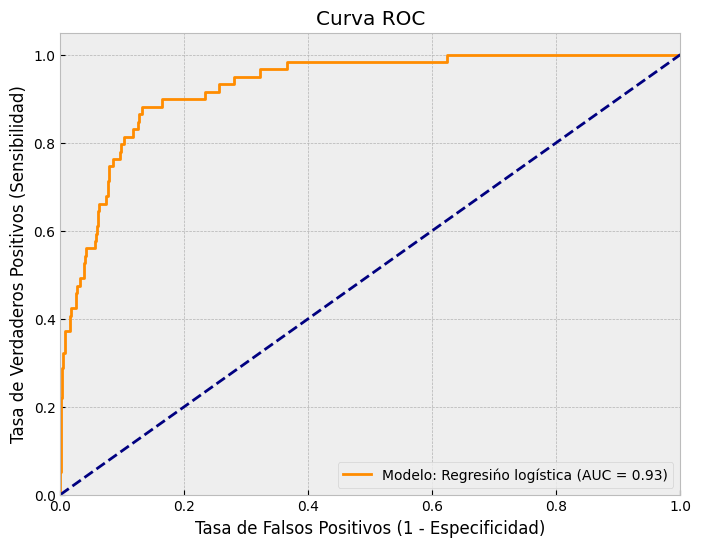

In [34]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Modelo: Regresińo logística (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

**Interpretación de la curva ROC:**

- **Punto Ideal**: El punto (0,1) en la curva ROC representa un clasificador perfecto que predice todas las instancias positivas correctamente y ninguna instancia negativa incorrectamente.
  
- **Línea de Referencia**: La línea diagonal (0,0) a (1,1) representa el rendimiento de un clasificador aleatorio.

- **Área bajo la Curva (AUC)**: El AUC es una medida numérica del rendimiento global del modelo. Un AUC cercano a 1 indica un buen rendimiento del modelo en la clasificación, mientras que un AUC cercano a 0.5 indica un rendimiento similar al azar.

**Consideraciones:**

- La curva ROC y el AUC son útiles para comparar modelos y seleccionar el mejor modelo basado en su rendimiento de clasificación.
  
- Es importante tener en cuenta que la curva ROC y el AUC son robustos frente al desbalance de clases en comparación con métricas como la precisión y el recall.



**Métrica AUC**

La métrica AUC (Area Under the Curve) es una medida utilizada para evaluar la calidad de un modelo de clasificación binaria. Específicamente, AUC representa el área bajo la curva ROC (Receiver Operating Characteristic), que es una representación gráfica de la tasa de verdaderos positivos (Sensibilidad) frente a la tasa de falsos positivos (1 - Especificidad) para diferentes umbrales de clasificación.

**Funcionamiento de la métrica AUC:**

1. **Curva ROC**: La curva ROC representa cómo varía la tasa de verdaderos positivos (Sensibilidad) en función de la tasa de falsos positivos (1 - Especificidad) a medida que se cambia el umbral de decisión del modelo.

2. **Área bajo la curva (AUC)**: AUC es el área bajo la curva ROC. Cuanto mayor sea el AUC, mejor es el rendimiento del modelo en términos de su capacidad para distinguir entre las clases positiva y negativa.

3. **Interpretación de AUC**:
   - AUC varía entre 0 y 1. Un modelo con AUC igual a 1 indica que es capaz de distinguir perfectamente entre todas las pares de observaciones de clase positiva y clase negativa.
   - Un modelo con AUC igual a 0.5 tiene un rendimiento similar al azar, es decir, no tiene capacidad discriminatoria entre las clases positiva y negativa.
   - Un AUC entre 0.5 y 1 indica que el modelo tiene cierta capacidad para discriminar entre las clases, siendo 0.5 el mínimo para un modelo útil.

**Aplicaciones de AUC:**

- **Comparación de modelos**: AUC es útil para comparar varios modelos de clasificación binaria. Un modelo con un AUC mayor generalmente se considera mejor en términos de rendimiento de clasificación.
  
- **Evaluación en desbalance de clases**: AUC es robusto frente a problemas de desbalance de clases, a diferencia de métricas como la precisión y el recall que pueden verse sesgadas por la distribución de clases en los datos.

**Cómo se calcula AUC en la práctica:**

En Python, puedes calcular AUC utilizando la función `roc_auc_score` de la biblioteca `scikit-learn`. Aquí tienes un ejemplo básico:

In [35]:
from sklearn.metrics import roc_auc_score


auc_score = roc_auc_score(y_test, y_prob)
print("AUC =",auc_score)

AUC = 0.9282564465285237


- `y_test`: Son las etiquetas verdaderas del conjunto de datos.
- `y_prob`: Son las probabilidades predichas por el modelo para la clase positiva.

El resultado `auc_score` será el valor numérico del AUC para el modelo evaluado.


**Existe una manera de crea una curva roc más rápido**

In [36]:
class Model:
  def __init__(self, model):
    self.model = model

  def predict(self, X):
    return self.model.predict(X).round()

Para calcularla, solo tenemos que tener las predicciones.

In [37]:
model = Model(results)
y_prod = model.predict(X_test)

In [38]:
y_prod[:4]

,0
9953,0.0
3850,0.0
4962,0.0
3886,0.0


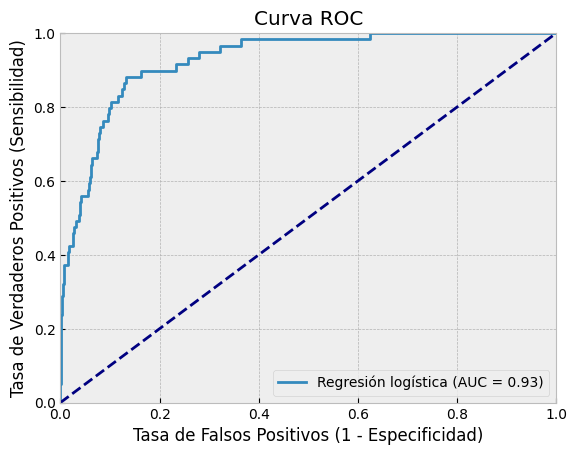

In [39]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

display_1 = RocCurveDisplay.from_predictions(y_test, y_pred, name='Regresión logística')



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()



Ahora, ya podemos darnos una idea del rendimiento de nuestro modelo de regresión logística, pero, ahora queremos saber, qué umbral de decisión vamos a elegir para tener un adecuado clasificador. Para ello haremos uso del Indice Younden.


El índice de Youden es una métrica que se utiliza en el contexto de las curvas ROC (Receiver Operating Characteristic) para evaluar el rendimiento de un modelo de clasificación binaria. Este índice proporciona una medida del equilibrio entre la sensibilidad y la especificidad del modelo, ayudando a determinar el umbral óptimo de clasificación.

**Fórmula del Índice de Youden**

El índice de Youden (J) se calcula como la suma de la sensibilidad (Sens) y la especificidad (Spec), menos uno:

$$J = \text{Sensibilidad} + \text{Especificidad} - 1$$

Matemáticamente, se puede expresar de la siguiente manera:

$$J = \text{Sensibilidad} - (1 - \text{Especificidad})$$

**Interpretación del Índice de Youden**

- **Valor del Índice de Youden**:
  - Si el índice de Youden es igual a 1, significa que el modelo tiene una sensibilidad y una especificidad perfectas.
  - Si el índice de Youden es igual a 0, indica que el modelo es tan bueno como una predicción aleatoria.
  - Valores negativos del índice de Youden implican que el modelo está peor que una predicción aleatoria.

- **Aplicación en la Curva ROC**:
  - En el contexto de la curva ROC, el índice de Youden ayuda a determinar el punto óptimo en la curva donde se maximiza la suma de la sensibilidad y la especificidad, lo cual es deseable en muchos casos.

**Cálculo del Índice de Youden en Python**

En Python, puedes calcular el índice de Youden utilizando métricas derivadas de la curva ROC, como se muestra a continuación:

In [40]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_prob)



In [41]:
# Calcular el índice de Youden para cada punto de corte (umbral)
youden_index = tpr - fpr



In [42]:
idx = np.argmax(youden_index)
idx

68

In [43]:
# # Encontrar el umbral óptimo (el máximo índice de Youden)
optimal_threshold = thresholds[idx]

optimal_threshold

0.03206781161526301

In [44]:
print("Índice de Youden máximo:", np.max(youden_index))
print("Umbral óptimo:", optimal_threshold)
data = np.array([youden_index.tolist(), thresholds.tolist()])
y_i = pd.DataFrame(data=data.T, columns=['youden_index','threshold'])
y_i.head()

Índice de Youden máximo: 0.7494651542538793
Umbral óptimo: 0.03206781161526301


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,youden_index,threshold
0,0.000000,inf
1,0.016949,0.967464
2,0.050847,0.946715
3,0.050332,0.906834
4,0.118129,0.781277


- `roc_curve` de `scikit-learn` calcula los valores de tasa de falsos positivos (`fpr`) y tasa de verdaderos positivos (`tpr`) para diferentes umbrales de decisión.
- `youden_index = tpr - fpr` calcula el índice de Youden para cada umbral.
- `np.argmax(youden_index)` encuentra el índice del umbral que maximiza el índice de Youden.
- `optimal_threshold` es el umbral óptimo que maximiza el índice de Youden.

Ahora revisamos las métricas de rendimiento con un umbral de $0.5$ y el nuevo umbral obtenido con el indice Younden

In [52]:
# Obtener predicciones de clase (0 o 1)
y_pred = results.predict(X_test)  # Predicciones como probabilidades

# Convertir probabilidades en clases binarias (0 o 1)
y_pred_binary = (y_pred > 0.5).astype(int)  # Ajusta el umbral según tus necesidades

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.97
Precision: 0.63
Recall: 0.32
F1-score: 0.43
Confusion Matrix:
[[1930   11]
 [  40   19]]


Cuando están diseñando un modelo de clasifición, es importante variar el umbral de decisión, y dependiendo de nuestro objetivo, elegimos el umbral que mejore ya sea el Recall, la precisión, o F1-score.

En teoría debería dar mejores rendimientos.

In [53]:
# Obtener predicciones de clase (0 o 1)
y_pred = results.predict(X_test)  # Predicciones como probabilidades

# Convertir probabilidades en clases binarias (0 o 1)
y_pred_binary = (y_pred > optimal_threshold).astype(int)  # Ajusta el umbral según tus necesidades

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.87
Precision: 0.17
Recall: 0.86
F1-score: 0.28
Confusion Matrix:
[[1685  256]
 [   8   51]]



**Importancia del Índice de Youden**

El índice de Youden es útil para evaluar el rendimiento global de un modelo de clasificación binaria y determinar el umbral de clasificación que maximiza simultáneamente la sensibilidad y la especificidad. Esto proporciona un equilibrio adecuado entre la capacidad del modelo para identificar positivos verdaderos y negativos verdaderos, dependiendo del contexto de la aplicación.



Si ahora lo hacemos a ojo de buen cubero.

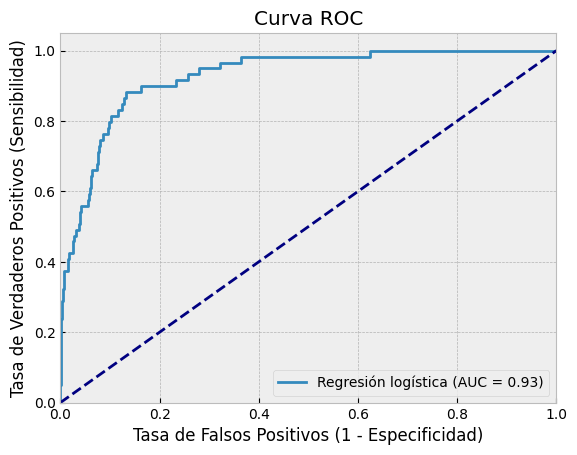

In [54]:
display_1 = RocCurveDisplay.from_predictions(y_test, y_pred, name='Regresión logística')



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [55]:
threshold = 0.53
# Obtener predicciones de clase (0 o 1)
y_pred = results.predict(X_test)  # Predicciones como probabilidades

# Convertir probabilidades en clases binarias (0 o 1)
y_pred_binary = (y_pred > threshold).astype(int)  # Ajusta el umbral según tus necesidades

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.98
Precision: 0.68
Recall: 0.32
F1-score: 0.44
Confusion Matrix:
[[1932    9]
 [  40   19]]


Y lo comparamos con el otro modelo.

In [56]:
# Obtener predicciones de clase (0 o 1)
y_pred = results.predict(X_test)  # Predicciones como probabilidades

# Convertir probabilidades en clases binarias (0 o 1)
y_pred_binary = (y_pred > 0.5).astype(int)  # Ajusta el umbral según tus necesidades

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.97
Precision: 0.63
Recall: 0.32
F1-score: 0.43
Confusion Matrix:
[[1930   11]
 [  40   19]]


**Regresión logística multiple:**

Para obtener la regresión logística multiple solo se extiende el algoritmo anterior y siguiendo el problema de predecir el impago tenemos lo siguiente:

$$p(\text{default} \mid X) = \frac{1}{1+e^\left({w_0 + w_1 \cdot \text{balance} + w_2 \cdot \text{income} + w_3 \cdot \text{student}}\right)}$$

De este modo ahora podemos tenemos un nuevo modelo propuesto

In [58]:
Default.head()



,default,student,balance,income,default_dummies_Yes_No
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


Primero transformamos la variable student en una variable *dummie*.

In [59]:
student_map = {'No': 0, 'Yes': 1}
Default['student_dummies'] = Default['student'].map(student_map)
Default.head()

,default,student,balance,income,default_dummies_Yes_No,student_dummies
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


Ahora creamos nuestras variables de entrada y variables de salida.

In [60]:
# Seleccionamos nuestras variables de entrada.

X = Default[['balance', 'income', 'student_dummies']]
X = sm.add_constant(X)
y = Default['default_dummies_Yes_No']

display(X)
display(y)

,const,balance,income,student_dummies
0,1.0,729.526495,44361.625074,0
1,1.0,817.180407,12106.134700,1
2,1.0,1073.549164,31767.138947,0
3,1.0,529.250605,35704.493935,0
4,1.0,785.655883,38463.495879,0
...,...,...,...,...
9995,1.0,711.555020,52992.378914,0
9996,1.0,757.962918,19660.721768,0
9997,1.0,845.411989,58636.156984,0
9998,1.0,1569.009053,36669.112365,0


,default_dummies_Yes_No
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


Definidas nuestras variables de entrada, ajustamos nuestro modelo de regresión logistica multiple.

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                             Logit Regression Results                             
Dep. Variable:     default_dummies_Yes_No   No. Observations:                10000
Model:                              Logit   Df Residuals:                     9996
Method:                               MLE   Df Model:                            3
Date:                    Thu, 22 Aug 2024   Pseudo R-squ.:                  0.4619
Time:                            01:35:45   Log-Likelihood:                -785.77
converged:                           True   LL-Null:                       -1460.3
Covariance Type:                nonrobust   LLR p-value:                3.257e-292
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.8690      0.492    -22.079      0.000     -

<ipython-input-61-c420956bf293>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_line =  f_sigmoid(results.params[0] + results.params[1] * x_line)


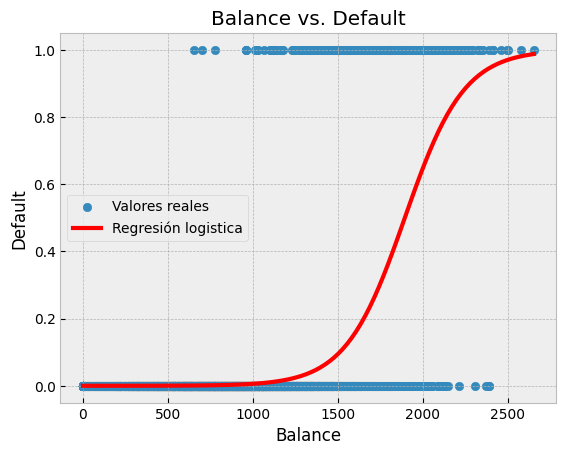

In [61]:
model = sm.Logit(y, X)
results = model.fit()

print(results.summary())

x_plot = results.predict(X)

x_line = np.linspace(X.values[:,1].min(), X.values[:,1].max(), 100)
f_sigmoid = lambda z: 1 / (1 + np.exp(-z))
y_line =  f_sigmoid(results.params[0] + results.params[1] * x_line)


plt.title("Balance vs. Default")
plt.scatter(X.iloc[:,1], y, label="Valores reales")
plt.plot(x_line, y_line, color='red', label='Regresión logistica', linewidth=3)
plt.xlabel('Balance')
plt.ylabel('Default')
plt.legend()
plt.show()

Revisamos los efectos marginales.

In [62]:
print("Tabla de efectos marginales de cada variable: ")
print(results.get_margeff().summary())

Tabla de efectos marginales de cada variable: 
          Logit Marginal Effects         
Dep. Variable:     default_dummies_Yes_No
Method:                              dydx
At:                               overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
balance             0.0001   4.85e-06     25.398      0.000       0.000       0.000
income           6.517e-08   1.76e-07      0.370      0.711    -2.8e-07     4.1e-07
student_dummies    -0.0139      0.005     -2.735      0.006      -0.024      -0.004


Ajustamos el modelo sin la variable `income`.

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10
                             Logit Regression Results                             
Dep. Variable:     default_dummies_Yes_No   No. Observations:                10000
Model:                              Logit   Df Residuals:                     9997
Method:                               MLE   Df Model:                            2
Date:                    Thu, 22 Aug 2024   Pseudo R-squ.:                  0.4619
Time:                            01:44:12   Log-Likelihood:                -785.84
converged:                           True   LL-Null:                       -1460.3
Covariance Type:                nonrobust   LLR p-value:                1.189e-293
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -10.7495      0.369    -29.115      0.000     -

<ipython-input-63-4f5d2b8a5c54>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_line =  f_sigmoid(results.params[0] + results.params[1] * x_line)


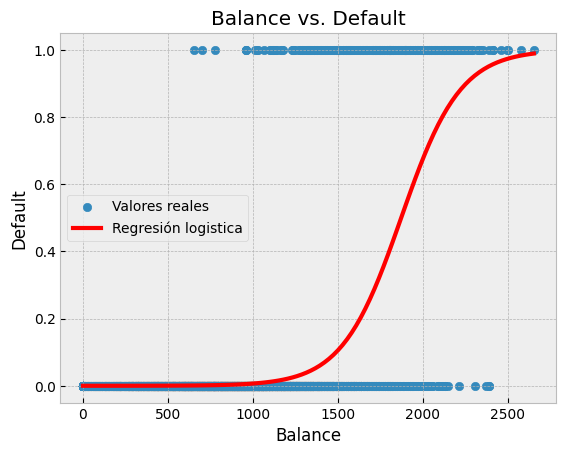

In [63]:
X = Default[['balance', 'student_dummies']]
X = sm.add_constant(X)
y = Default['default_dummies_Yes_No']


model = sm.Logit(y, X)
results = model.fit()

print(results.summary())

print("Tabla de efectos marginales de cada variable: ")
print(results.get_margeff().summary())

x_plot = results.predict(X)

x_line = np.linspace(X.values[:,1].min(), X.values[:,1].max(), 100)
f_sigmoid = lambda z: 1 / (1 + np.exp(-z))
y_line =  f_sigmoid(results.params[0] + results.params[1] * x_line)


plt.title("Balance vs. Default")
plt.scatter(X.iloc[:,1], y, label="Valores reales")
plt.plot(x_line, y_line, color='red', label='Regresión logistica', linewidth=3)
plt.xlabel('Balance')
plt.ylabel('Default')
plt.legend()
plt.show()

**¿Cómo interpretamos los datos?**

 - Si el efecto marginal es $-0.0154$, significa que un aumento de una unidad en la variable independiente está asociado con un cambio porcentual en la probabilidad de $-1.54\%$.
 - Los odds (recordando):
 $$odds = \frac{p(X)}{1-p(X)} = e^{w_0 + w_1X}$$


**Clases desbalanceadas**

El desbalance de clases es una situación común en problemas de clasificación donde una o más clases tienen significativamente menos instancias que otras. Esto puede presentar varios desafíos para el entrenamiento y la evaluación de modelos de aprendizaje automático.


**Causas del desbalance de clases**

 - **Distribución natural de los datos**: En muchos conjuntos de datos del mundo real, ciertas clases pueden ser menos frecuentes que otras debido a la distribución natural de los fenómenos que se están estudiando.

 - **Problemas de recolección de datos**: La forma en que se recolectan los datos puede llevar a que ciertas clases sean subrepresentadas o sobre representadas en comparación con otras.

 - **Costos de recolección de datos**: Puede ser más costoso o difícil obtener muestras de algunas clases en comparación con otras, lo que lleva a un desbalance en el conjunto de datos.

**Desafíos del desbalance de clases**

 - **Impacto en el rendimiento del modelo**: Los algoritmos de aprendizaje automático tienden a favorecer las clases mayoritarias, lo que puede llevar a modelos que no generalizan bien para las clases minoritarias.

 - **Interpretación sesgada de las métricas**: Las métricas como la exactitud pueden ser engañosas en conjuntos de datos desbalanceados, ya que un modelo que predice siempre la clase mayoritaria puede tener una alta exactitud pero un rendimiento deficiente en las clases minoritarias.

 - **Costos asimétricos de los errores**: En algunos casos, los errores de predicción en las clases minoritarias pueden tener costos significativamente más altos que los errores en las clases mayoritarias. Por ejemplo, en detección de fraudes, predecir incorrectamente un fraude como no fraude puede tener consecuencias financieras graves.

**Estrategias para manejar el desbalance de clases**

 - **Recolección de más datos**: Intentar recolectar más datos para las clases minoritarias puede ayudar a equilibrar la distribución de clases en el conjunto de entrenamiento.

 - **Técnicas de muestreo**: Estrategias como el sobremuestreo (oversampling) de las clases minoritarias o el submuestreo (undersampling) de las clases mayoritarias pueden ajustar la distribución de clases en el conjunto de entrenamiento.

 - **Pesos de clase**: Algunos algoritmos permiten asignar pesos diferentes a las clases durante el entrenamiento para penalizar más los errores en las clases minoritarias.

 - **Métricas adecuadas**: Utilizar métricas como precisión, recall, F1-score o AUC-ROC que sean más informativas en conjuntos de datos desbalanceados.

 - **Generación de datos sintéticos**: Generar instancias sintéticas para las clases minoritarias mediante técnicas como SMOTE (Synthetic Minority Over-sampling Technique) puede aumentar la cantidad de datos disponibles para el entrenamiento.

En resumen, el desbalance de clases es un problema importante en el aprendizaje automático y requiere atención especial durante el preprocesamiento de datos y la evaluación del modelo para garantizar un rendimiento equilibrado y efectivo en todas las clases del problema.

**Veamos un ejemplo**

**Información del conjunto de datos**


Este conjunto de datos contiene información sobre pagos/impago, factores demográficos, datos crediticios, historial de pagos y extractos de cuentas de clientes de tarjetas de crédito en Taiwán desde abril de 2005 hasta septiembre de 2005.

Contenido
Hay 25 variables:


- **ID**: ID de cada cliente
- **LIMIT_BAL**: Monto de crédito otorgado en dólares de Nueva Taiwán (incluye crédito individual y familiar/suplementario)
- **SEXO**: Género (1=masculino, 2=femenino)
- **EDUCATION**: (1=escuela de posgrado, 2=universidad, 3=escuela secundaria, 4=otros, 5=desconocido, 6=desconocido)
- **MARRIAGE**: Estado civil (1=casado, 2=soltero, 3=otros)
- **AGE**: Edad en años
- **PAY_0**: Estado de pago en septiembre de 2005 (-1=pago puntual, 1=retraso en el pago de un mes, 2=retraso en el pago de dos meses, ... 8=retraso en el pago de ocho meses, 9=retraso en el pago de nueve meses o más)
- **PAY_2**: Estado de pago en agosto de 2005 (escala igual que arriba)
- **PAY_3**: Estado de pago en julio de 2005 (escala igual que arriba)
- **PAY_4**: Estado de pago en junio de 2005 (escala igual que arriba)
- **PAY_5**: Estado de pago en mayo de 2005 (escala igual que arriba)
- **PAY_6**: Estado de pago en abril de 2005 (escala igual que arriba)
- **BILL_AMT1**: Monto del estado de cuenta en septiembre de 2005 (dólar de Nueva Taiwán)
- **BILL_AMT2**: Monto del estado de cuenta en agosto de 2005 (dólar de Nueva Taiwán)
- **BILL_AMT3**: Monto del estado de cuenta en julio de 2005 (dólar de Nueva Taiwán)
- **BILL_AMT4**: Monto del estado de cuenta en junio de 2005 (dólar de Nueva Taiwán)
- **BILL_AMT5**: Monto del estado de cuenta en mayo de 2005 (dólar de Nueva Taiwán)
- **BILL_AMT6**: Monto del estado de cuenta en abril de 2005 (dólar de Nueva Taiwán)
- **PAY_AMT1**: Monto del pago anterior en septiembre de 2005 (dólar de Nueva Taiwán)
- **PAY_AMT2**: Monto del pago anterior en agosto de 2005 (dólar de Nueva Taiwán)
- **PAY_AMT3**: Monto del pago anterior en julio de 2005 (dólar de Nueva Taiwán)
- **PAY_AMT4**: Monto del pago anterior en junio de 2005 (dólar de Nueva Taiwán)
- **PAY_AMT5**: Monto del pago anterior en mayo de 2005 (dólar de Nueva Taiwán)
- **PAY_AMT6**: Monto del pago anterior en abril de 2005 (dólar de Nueva Taiwán)
- **default.payment.next.month**: Pago por defecto (1=sí, 0=no)


Vamos a crear un nuevo modelo.

Elegir como variables de entrada: `LIMIT_BAL`, `SEXO`, `EDUCATION`, `MARRIAGE` y `AGE`.

variable de salida: `default.payment.next.month`.



Cargamos los datos.

In [65]:
Credit = pd.read_csv('UCI_Credit_Card.csv')
Credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [66]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Seleccionamos nuestras variables de entrada y nuestras variables de salida.

In [75]:
X = Credit[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
y = Credit['default.payment.next.month']

# X = sm.add_constant(X)
display(X)
display(y)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,20000.0,2,2,1,24
1,120000.0,2,2,2,26
2,90000.0,2,2,2,34
3,50000.0,2,2,1,37
4,50000.0,1,2,1,57
...,...,...,...,...,...
29995,220000.0,1,3,1,39
29996,150000.0,1,3,2,43
29997,30000.0,1,2,2,37
29998,80000.0,1,3,1,41


,default.payment.next.month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


Veamos como están los datos.

In [77]:
set(y)

{0, 1}

In [78]:
value_counts = y.value_counts()
value_counts

,count
default.payment.next.month,
0,23364
1,6636


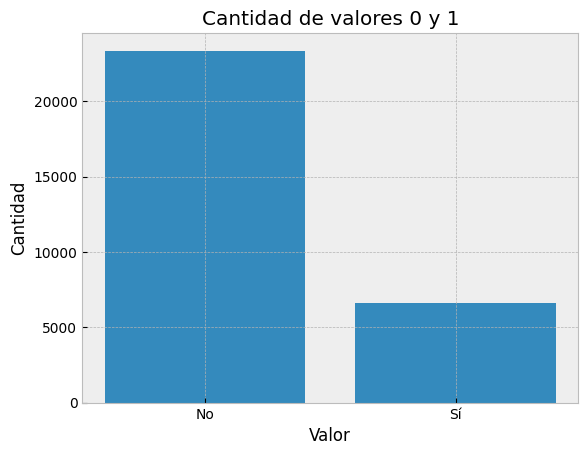

In [79]:
# Crear el gráfico de barras
plt.bar(value_counts.index, value_counts.values)

# Personalizar el gráfico
plt.title('Cantidad de valores 0 y 1')
plt.xlabel('Valor')
plt.ylabel('Cantidad')
plt.xticks(value_counts.index, ['No', 'Sí'])  # Etiquetas personalizadas para los valores 0 y 1

# Mostrar el gráfico
plt.show()

Creamos variables *dummies*.

In [80]:
set(X['MARRIAGE'])

{0, 1, 2, 3}

In [81]:
columns = ['SEX','EDUCATION', 'MARRIAGE']
X_dummies = pd.get_dummies(X, columns=columns)
X_dummies.head()

,LIMIT_BAL,AGE,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,False,True,False,False,True,False,False,False,False,False,True,False,False
1,120000.0,26,False,True,False,False,True,False,False,False,False,False,False,True,False
2,90000.0,34,False,True,False,False,True,False,False,False,False,False,False,True,False
3,50000.0,37,False,True,False,False,True,False,False,False,False,False,True,False,False
4,50000.0,57,True,False,False,False,True,False,False,False,False,False,True,False,False


In [83]:
X = X_dummies.drop('SEX_1', axis=1).drop('EDUCATION_0', axis=1).drop('EDUCATION_1', axis=1).drop('MARRIAGE_0', axis=1)
X = sm.add_constant(X)
X.head()

,const,LIMIT_BAL,AGE,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1.0,20000.0,24,True,True,False,False,False,False,True,False,False
1,1.0,120000.0,26,True,True,False,False,False,False,False,True,False
2,1.0,90000.0,34,True,True,False,False,False,False,False,True,False
3,1.0,50000.0,37,True,True,False,False,False,False,True,False,False
4,1.0,50000.0,57,False,True,False,False,False,False,True,False,False


Transformar los datos de manera adecuada.

In [84]:
for i in X.columns:
  print(i)
  X[i] = X[i].astype(float)

const
LIMIT_BAL
AGE
SEX_2
EDUCATION_2
EDUCATION_3
EDUCATION_4
EDUCATION_5
EDUCATION_6
MARRIAGE_1
MARRIAGE_2
MARRIAGE_3


In [85]:
X.head()

,const,LIMIT_BAL,AGE,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1.0,20000.0,24.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,120000.0,26.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,90000.0,34.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,50000.0,37.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,50000.0,57.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
# X son las características (atributos) y y es la variable objetivo (etiquetas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [87]:
model = sm.Logit(y_train, X_train)
results = model.fit()

print(results.summary())

print("Tabla de efectos marginales de cada variable: ")
print(results.get_margeff().summary())


Optimization terminated successfully.
         Current function value: 0.512660
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                24000
Model:                                  Logit   Df Residuals:                    23988
Method:                                   MLE   Df Model:                           11
Date:                        Thu, 22 Aug 2024   Pseudo R-squ.:                 0.02888
Time:                                02:10:03   Log-Likelihood:                -12304.
converged:                               True   LL-Null:                       -12670.
Covariance Type:                    nonrobust   LLR p-value:                7.777e-150
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.7530      0.485     -3.6

In [88]:
# Obtener predicciones de clase (0 o 1)
y_pred = results.predict(X_test)  # Predicciones como probabilidades

# Convertir probabilidades en clases binarias (0 o 1)
y_pred_binary = (y_pred > 0.5).astype(int)  # Ajusta el umbral según tus necesidades

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.78
Precision: 0.00
Recall: 0.00
F1-score: 0.00
Confusion Matrix:
[[4663    0]
 [1337    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Recordando**:


1. **Exactitud (Accuracy)**:
   - También conocida como “accuracy” y se define como el número de predicciones correctas realizadas, dividido entre el número de registros o datos totales que se tienen en la base de datos para hacer el análisis.

2. **Precisión (Precision)**:
   - Esta métrica evalúa la capacidad del modelo de predecir casos positivos considerando todos los casos positivos y aquellos casos en los que se clasificó como positivo cuando el caso es negativo.

3. **Recall (Sensibilidad o Tasa de Verdaderos Positivos)**:
   - Es la tasa para poder predecir casos positivos entre todos los valores positivos.

4. **F1-score**:
   - Es una medida armónica que contempla tanto la precisión como la sensibilidad. Esta medida contempla tanto los falsos positivos como los falsos negativos.

5. **Especificidad (Specificity o Tasa de Verdaderos Negativos)**:
   - La especificidad (Specificity), es la tasa negativa verdadera, que se calcula como el número de predicciones negativas correctas, entre el número total de negativos.


Revisamos la curva roc

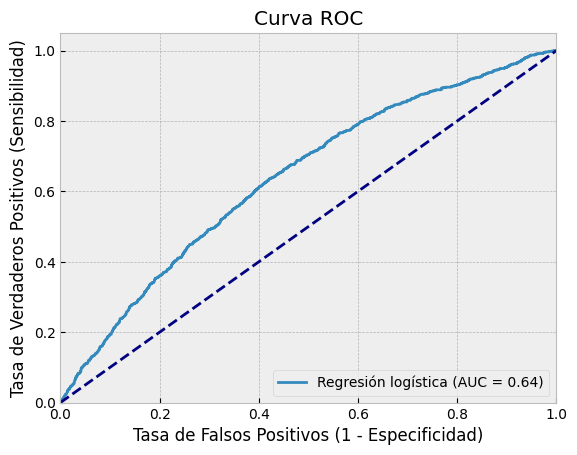

In [89]:
display_1 = RocCurveDisplay.from_predictions(y_test, y_pred, name='Regresión logística')



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Usamos el índice de Youden

In [90]:
y_prob = results.predict(X_test)  # Probabilidades de pertenecer a la clase 1

In [91]:
# Supongamos que tienes y_true (etiquetas verdaderas) y y_pred_prob (probabilidades predichas de clase positiva)
roc_auc = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el índice de Youden para cada punto de corte (umbral)
youden_index = tpr - fpr

# # Encontrar el umbral óptimo (el máximo índice de Youden)
optimal_threshold = thresholds[np.argmax(youden_index)]

print("Índice de Youden máximo:", np.max(youden_index))
print("Umbral óptimo:", optimal_threshold)

Índice de Youden máximo: 0.214882641254671
Umbral óptimo: 0.23203959891160875


Revisamos las métricas

In [92]:
# Obtener predicciones de clase (0 o 1)
y_pred = results.predict(X_test)  # Predicciones como probabilidades

# Convertir probabilidades en clases binarias (0 o 1)
y_pred_binary = (y_pred > optimal_threshold).astype(int)  # Ajusta el umbral según tus necesidades

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.59
Precision: 0.30
Recall: 0.64
F1-score: 0.41
Confusion Matrix:
[[2698 1965]
 [ 487  850]]


Ahora, vamos a balancear los datos.

Pero antes, ¿cómo funciona el balancelo de datos?

Podemos usar dos técnicas utilizadas en aprendizaje automático:
 - Submuestreo, y
 - Sobremuestreo.

Apliquemos primero el submuestreo.

In [93]:
df_temp_yes = Credit.groupby('default.payment.next.month').get_group(1)
df_temp_no = Credit.groupby('default.payment.next.month').get_group(0)
display(df_temp_yes.head(4))
display(df_temp_no.head(4))

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,14,70000.0,1,2,2,30,1,2,2,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,17,20000.0,1,1,2,24,0,0,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:
len(df_temp_yes), len(df_temp_no)

(6636, 23364)

Ahora tenemos que reducir el número de datos.

In [ ]:
sample_no = df_temp_no.sample(n=len(df_temp_yes), random_state=1, replace=False)
len(sample_no)

6636

In [ ]:
sub_sample_df = pd.concat([df_temp_yes, sample_no])
sub_sample_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,14,70000.0,1,2,2,30,1,2,2,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,17,20000.0,1,1,2,24,0,0,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,22,120000.0,2,2,1,39,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1


Ahora tomemos los datos con los que vamos a trabar.

In [ ]:
X = sub_sample_df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
y = sub_sample_df['default.payment.next.month']

# X = sm.add_constant(X)
columns = ['SEX','EDUCATION', 'MARRIAGE']
X_dummies = pd.get_dummies(X, columns=columns)

X_dummies.head()

,LIMIT_BAL,AGE,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,False,True,False,False,True,False,False,False,False,False,True,False,False
1,120000.0,26,False,True,False,False,True,False,False,False,False,False,False,True,False
13,70000.0,30,True,False,False,False,True,False,False,False,False,False,False,True,False
16,20000.0,24,True,False,False,True,False,False,False,False,False,False,False,True,False
21,120000.0,39,False,True,False,False,True,False,False,False,False,False,True,False,False


In [ ]:

X = X_dummies.drop('SEX_1', axis=1).drop('EDUCATION_0', axis=1).drop('EDUCATION_1', axis=1).drop('MARRIAGE_0', axis=1)
X = sm.add_constant(X)


for i in X.columns:
  X[i] = X[i].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

model = sm.Logit(y_train, X_train)
results = model.fit()

print(results.summary())

print("Tabla de efectos marginales de cada variable: ")
print(results.get_margeff().summary())

Optimization terminated successfully.
         Current function value: 0.668850
         Iterations 5
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                10617
Model:                                  Logit   Df Residuals:                    10605
Method:                                   MLE   Df Model:                           11
Date:                        Sat, 29 Jun 2024   Pseudo R-squ.:                 0.03502
Time:                                00:55:52   Log-Likelihood:                -7101.2
converged:                               True   LL-Null:                       -7358.9
Covariance Type:                    nonrobust   LLR p-value:                1.642e-103
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6678      0.536     -1.2

Checamos las métricas

In [94]:
# Obtener predicciones de clase (0 o 1)
y_pred = results.predict(X_test)  # Predicciones como probabilidades

# Convertir probabilidades en clases binarias (0 o 1)
y_pred_binary = (y_pred > 0.5).astype(int)  # Ajusta el umbral según tus necesidades

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.78
Precision: 0.00
Recall: 0.00
F1-score: 0.00
Confusion Matrix:
[[4663    0]
 [1337    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Checamos la curva roc.

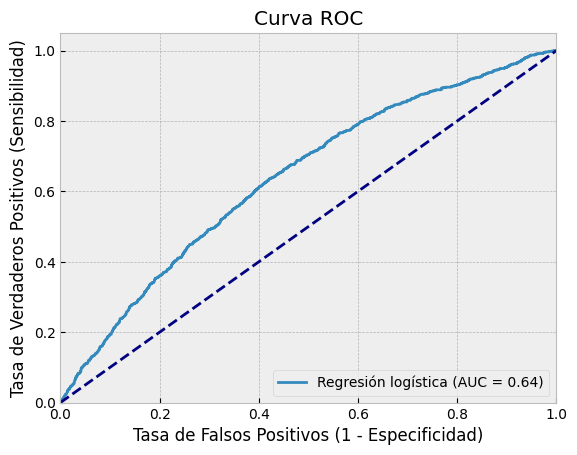

In [95]:
display_1 = RocCurveDisplay.from_predictions(y_test, y_pred, name='Regresión logística')



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Aplicamos de nuevo el índice de Youden

In [96]:
# realizarmos predicciones
y_prob = results.predict(X_test)  # Probabilidades de pertenecer a la clase 1

# Supongamos que tienes y_true (etiquetas verdaderas) y y_pred_prob (probabilidades predichas de clase positiva)
roc_auc = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el índice de Youden para cada punto de corte (umbral)
youden_index = tpr - fpr

# # Encontrar el umbral óptimo (el máximo índice de Youden)
optimal_threshold = thresholds[np.argmax(youden_index)]

print("Índice de Youden máximo:", np.max(youden_index))
print("Umbral óptimo:", optimal_threshold)

Índice de Youden máximo: 0.214882641254671
Umbral óptimo: 0.23203959891160875


In [98]:
# Obtener predicciones de clase (0 o 1)
y_pred = results.predict(X_test)  # Predicciones como probabilidades

# Convertir probabilidades en clases binarias (0 o 1)
y_pred_binary = (y_pred > optimal_threshold).astype(int)  # Ajusta el umbral según tus necesidades

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.59
Precision: 0.30
Recall: 0.64
F1-score: 0.41
Confusion Matrix:
[[2698 1965]
 [ 487  850]]


Comparamos con métricas anteriores:

Accuracy: 0.61

Precision: 0.60

Recall: 0.68

F1-score: 0.64

Confusion Matrix:

[[685 606]

 [439 925]]

Ahora aplicamos un sobre muestreo.

In [99]:
df_temp_yes = Credit.groupby('default.payment.next.month').get_group(1)
df_temp_no = Credit.groupby('default.payment.next.month').get_group(0)


In [100]:
len(df_temp_yes), len(df_temp_no)

(6636, 23364)

In [101]:
sample_yes = df_temp_yes.sample(n=len(df_temp_no), random_state=11, replace=True)



In [102]:
sob_sample_df = pd.concat([sample_yes, df_temp_no])
sob_sample_df.head()


X = sob_sample_df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
y = sob_sample_df['default.payment.next.month']

# X = sm.add_constant(X)
columns = ['SEX','EDUCATION', 'MARRIAGE']
X_dummies = pd.get_dummies(X, columns=columns)
X_dummies.head()


X = X_dummies.drop('SEX_1', axis=1).drop('EDUCATION_0', axis=1).drop('EDUCATION_1', axis=1).drop('MARRIAGE_0', axis=1)
X = sm.add_constant(X)


for i in X.columns:
  X[i] = X[i].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

model = sm.Logit(y_train, X_train)
results = model.fit()

print(results.summary())

print("Tabla de efectos marginales de cada variable: ")
print(results.get_margeff().summary())

Optimization terminated successfully.
         Current function value: 0.669996
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                37382
Model:                                  Logit   Df Residuals:                    37370
Method:                                   MLE   Df Model:                           11
Date:                        Thu, 22 Aug 2024   Pseudo R-squ.:                 0.03340
Time:                                03:02:15   Log-Likelihood:                -25046.
converged:                               True   LL-Null:                       -25911.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.3811      0.296     -1.2

Revisamos métricas

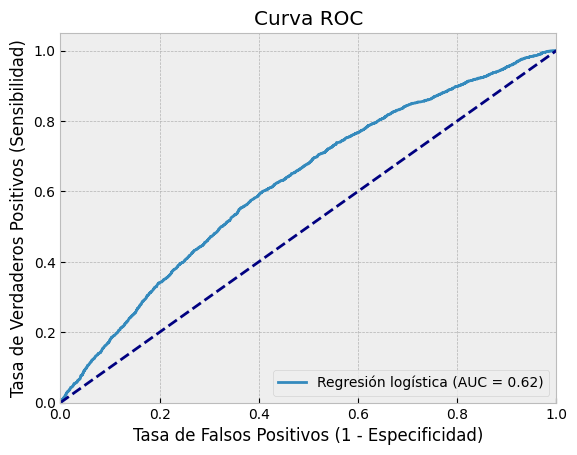

Accuracy: 0.59
Precision: 0.58
Recall: 0.68
F1-score: 0.62
Confusion Matrix:
[[2357 2325]
 [1508 3156]]
Índice de Youden máximo: 0.1923911363031881
Umbral óptimo: 0.5232261291396767
--------------------
Métricas con el umbral óptimo
--------------------
Accuracy: 0.60
Precision: 0.59
Recall: 0.60
F1-score: 0.60
Confusion Matrix:
[[2780 1902]
 [1873 2791]]


In [103]:
# Obtener predicciones de clase (0 o 1)
y_pred = results.predict(X_test)  # Predicciones como probabilidades

display_1 = RocCurveDisplay.from_predictions(y_test, y_pred, name='Regresión logística')



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()




# Convertir probabilidades en clases binarias (0 o 1)
y_pred_binary = (y_pred > 0.5).astype(int)  # Ajusta el umbral según tus necesidades

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

y_prob = results.predict(X_test)  # Probabilidades de pertenecer a la clase 1
# Supongamos que tienes y_true (etiquetas verdaderas) y y_pred_prob (probabilidades predichas de clase positiva)
roc_auc = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el índice de Youden para cada punto de corte (umbral)
youden_index = tpr - fpr

# # Encontrar el umbral óptimo (el máximo índice de Youden)
optimal_threshold = thresholds[np.argmax(youden_index)]

print("Índice de Youden máximo:", np.max(youden_index))
print("Umbral óptimo:", optimal_threshold)



# Obtener predicciones de clase (0 o 1)
y_pred = results.predict(X_test)  # Predicciones como probabilidades

# Convertir probabilidades en clases binarias (0 o 1)
y_pred_binary = (y_pred > optimal_threshold).astype(int)  # Ajusta el umbral según tus necesidades

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("-"*20)
print("Métricas con el umbral óptimo")
print("-"*20)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

**Regresión multinomial logística.**

$$P(Y_{i}=j \mid X_{i}) \text{; $j=0, 1, \ldots, J$}$$
$$P(Y_{i} \mid X_i) = \frac{e^{X_iW_{j}}}{1 + e^{ X_{i} W_{1}}+e^{ X_{i} W_{2}}+\cdots e^{ X_{i} W_{J}}}$$

Falta la teoría

**Veamos otro ejemplo con otra base de datos.**

Los datos son del trabajo realizado por Keane y Wolpin, 1997, el cual se titula "The Career Decisions of Young Men", de la revista Journal of Politica Economy, Vol. 105, No. 3, pp. 573-522. Este conjunto de datos contiene información historica de empleo y escolaridad para una muestra de hombres en los años de 1981 - 1987.

- id: identificador
- numyrs: número de años en la muestra
- year: 81 a 87
- choice: escuela=1, casa=2, trabajo en la oficina=3, trabajo en la construcción=4, servicios=5
- wage: salario anual, 1987 $
- educ: años de escolaridad
- expwc: experiencia en trabajo de cuello blanco
- expbc: experiencia en trabajo de cuello azul
- expser: experiencia en servicios
- manuf: =1 si trabaja en manufactura
- black: =1 si es de raza negra
- lwage: logaritmo del salario (log(wage))
- y81: =1 si el año es 81
- .. .y87
- enroll: =1 si la elección es ir a la escuela
- employ: =1 si la elección es trabajo en la oficina, trabajo en la construcción o servicios
- attrit: =1 si hay atrición en el siguiente año
- exper: expwc + expbc + expser
- expersq: exper^2
- status: estado: escuela=1, casa=2, trabajo=3

En nuestro ejemplo nosotros utilizaremos los datos de  1987.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


keane = pd.read_stata('keane.dta')

keane.head()


,id,numyrs,year,choice,wage,educ,expwc,expbc,expser,manuf,...,y84,y85,y86,y87,enroll,employ,attrit,exper,expersq,status
0,1,9,81,2.0,NaN,10,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
1,1,9,82,2.0,NaN,10,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
2,1,9,83,2.0,NaN,10,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,2.0
3,1,9,84,1.0,NaN,10,0,0,0,0.0,...,1,0,0,0,1,0,0,0,0,1.0
4,1,9,85,2.0,NaN,11,0,0,0,0.0,...,0,1,0,0,0,0,0,0,0,2.0


Con el siguiente filtro seleccionamos los datos de 1987.

In [105]:
keane = keane.loc[keane['y87'] == 1]
keane.head()

,id,numyrs,year,choice,wage,educ,expwc,expbc,expser,manuf,...,y84,y85,y86,y87,enroll,employ,attrit,exper,expersq,status
6,1,9,87,2.0,NaN,11,0,0,0,0.0,...,0,0,0,1,0,0,0,0,0,2.0
13,2,9,87,4.0,15841.410156,12,0,3,2,0.0,...,0,0,0,1,0,1,0,5,25,3.0
21,4,11,87,5.0,6093.600098,9,0,0,0,0.0,...,0,0,0,1,0,1,0,0,0,3.0
28,5,9,87,3.0,11017.230469,9,2,1,4,0.0,...,0,0,0,1,0,1,0,7,49,3.0
35,6,9,87,2.0,NaN,8,0,4,0,0.0,...,0,0,0,1,0,0,0,4,16,2.0


In [106]:
keane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1738 entries, 6 to 12722
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1738 non-null   int16  
 1   numyrs   1738 non-null   int8   
 2   year     1738 non-null   int8   
 3   choice   1717 non-null   float64
 4   wage     1241 non-null   float32
 5   educ     1738 non-null   int8   
 6   expwc    1738 non-null   int8   
 7   expbc    1738 non-null   int8   
 8   expser   1738 non-null   int8   
 9   manuf    1714 non-null   float64
 10  black    1738 non-null   int8   
 11  lwage    1241 non-null   float32
 12  y81      1738 non-null   int8   
 13  y82      1738 non-null   int8   
 14  y83      1738 non-null   int8   
 15  y84      1738 non-null   int8   
 16  y85      1738 non-null   int8   
 17  y86      1738 non-null   int8   
 18  y87      1738 non-null   int8   
 19  enroll   1738 non-null   int8   
 20  employ   1738 non-null   int8   
 21  attrit   1738 non-

In [107]:
keane = keane.dropna(subset=['status'])
keane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1717 entries, 6 to 12722
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1717 non-null   int16  
 1   numyrs   1717 non-null   int8   
 2   year     1717 non-null   int8   
 3   choice   1717 non-null   float64
 4   wage     1241 non-null   float32
 5   educ     1717 non-null   int8   
 6   expwc    1717 non-null   int8   
 7   expbc    1717 non-null   int8   
 8   expser   1717 non-null   int8   
 9   manuf    1714 non-null   float64
 10  black    1717 non-null   int8   
 11  lwage    1241 non-null   float32
 12  y81      1717 non-null   int8   
 13  y82      1717 non-null   int8   
 14  y83      1717 non-null   int8   
 15  y84      1717 non-null   int8   
 16  y85      1717 non-null   int8   
 17  y86      1717 non-null   int8   
 18  y87      1717 non-null   int8   
 19  enroll   1717 non-null   int8   
 20  employ   1717 non-null   int8   
 21  attrit   1717 non-

Creamos una nueva columna, con ceros y luego agregamos indormación para nombrar a cada una de las categorias.

In [108]:
set(keane['status'])

{1.0, 2.0, 3.0}

In [109]:
#
keane["estado"] = 0
keane.head()

,id,numyrs,year,choice,wage,educ,expwc,expbc,expser,manuf,...,y85,y86,y87,enroll,employ,attrit,exper,expersq,status,estado
6,1,9,87,2.0,NaN,11,0,0,0,0.0,...,0,0,1,0,0,0,0,0,2.0,0
13,2,9,87,4.0,15841.410156,12,0,3,2,0.0,...,0,0,1,0,1,0,5,25,3.0,0
21,4,11,87,5.0,6093.600098,9,0,0,0,0.0,...,0,0,1,0,1,0,0,0,3.0,0
28,5,9,87,3.0,11017.230469,9,2,1,4,0.0,...,0,0,1,0,1,0,7,49,3.0,0
35,6,9,87,2.0,NaN,8,0,4,0,0.0,...,0,0,1,0,0,0,4,16,2.0,0


In [110]:
keane.loc[keane['status'] == 2.0, "estado"] = 1
keane.loc[keane['status'] == 3.0, "estado"] = 2
keane.head()

,id,numyrs,year,choice,wage,educ,expwc,expbc,expser,manuf,...,y85,y86,y87,enroll,employ,attrit,exper,expersq,status,estado
6,1,9,87,2.0,NaN,11,0,0,0,0.0,...,0,0,1,0,0,0,0,0,2.0,1
13,2,9,87,4.0,15841.410156,12,0,3,2,0.0,...,0,0,1,0,1,0,5,25,3.0,2
21,4,11,87,5.0,6093.600098,9,0,0,0,0.0,...,0,0,1,0,1,0,0,0,3.0,2
28,5,9,87,3.0,11017.230469,9,2,1,4,0.0,...,0,0,1,0,1,0,7,49,3.0,2
35,6,9,87,2.0,NaN,8,0,4,0,0.0,...,0,0,1,0,0,0,4,16,2.0,1


In [111]:
set(keane["estado"])

{0, 1, 2}

Creamos nuestras variables de entrada y nuestras variables de salida.

In [112]:
import seaborn as sns
import statsmodels.api as sm

# Definición de variables:
X = keane[['educ', 'exper', 'expersq', 'black']]
X = sm.add_constant(X)

y = keane["estado"]

In [113]:
X.head()

,const,educ,exper,expersq,black
6,1.0,11,0,0,1
13,1.0,12,5,25,1
21,1.0,9,0,0,1
28,1.0,9,7,49,1
35,1.0,8,4,16,1


In [114]:
y

,estado
6,1
13,2
21,2
28,2
35,1
...,...
12688,0
12701,2
12708,2
12715,2


Hacemos el ajuste del modelo.

In [115]:
model = sm.MNLogit(y, X)

results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.528746
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                 estado   No. Observations:                 1717
Model:                        MNLogit   Df Residuals:                     1707
Method:                           MLE   Df Model:                            8
Date:                Thu, 22 Aug 2024   Pseudo R-squ.:                  0.2433
Time:                        03:04:13   Log-Likelihood:                -907.86
converged:                       True   LL-Null:                       -1199.7
Covariance Type:            nonrobust   LLR p-value:                7.383e-121
  estado=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2779      1.133      9.069      0.000       8.057      12.499
educ          -0.6736      0.

Revisamos los efectos marginales.

In [116]:
margeff = results.get_margeff()

print(margeff.summary())

       MNLogit Marginal Effects      
Dep. Variable:                 estado
Method:                          dydx
At:                           overall
  estado=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.0174      0.003      5.981      0.000       0.012       0.023
exper         -0.0313      0.007     -4.629      0.000      -0.045      -0.018
expersq        0.0030      0.001      2.937      0.003       0.001       0.005
black         -0.0184      0.013     -1.435      0.151      -0.043       0.007
------------------------------------------------------------------------------
  estado=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ          -0.0429      0.003    -14.312      0.000      -0.049      -0.037
exper         -0.1006      0.010    -10.429      0.000    

En modelos de regresión multinomial, como en otros modelos de regresión, puede ocurrir que los coeficientes estimados no sean estadísticamente significativos según las pruebas de hipótesis estándar (como el test t o el valor p asociado). Sin embargo, los efectos marginales pueden ser estadísticamente significativos. Esto puede deberse a varias razones:

1. **Diferencia en las pruebas de hipótesis**: Los coeficientes en un modelo de regresión multinomial se estiman usando máxima verosimilitud y están sujetos a ciertos supuestos y distribuciones asintóticas. Las pruebas de hipótesis para los coeficientes individuales pueden no detectar significancia estadística si la varianza es alta en relación con el tamaño del efecto.

2. **Efectos marginales**: Los efectos marginales representan el cambio esperado en la variable dependiente cuando una variable independiente específica cambia en una unidad, mientras se mantienen constantes las otras variables en el modelo. Estos efectos marginales pueden calcularse a partir de los coeficientes del modelo y pueden mostrar significancia estadística incluso cuando los coeficientes individuales no lo hacen. Esto ocurre porque los efectos marginales se basan en un análisis de los cambios en la variable dependiente en lugar de simplemente en la estimación de los coeficientes.

3. **Diferencias en la interpretación**: Los coeficientes de un modelo multinomial se interpretan en relación con una categoría de referencia específica de la variable dependiente y pueden no reflejar directamente la relación con las demás categorías. Los efectos marginales, por otro lado, proporcionan una interpretación directa de cómo cambia la probabilidad de pertenecer a una categoría específica de la variable dependiente con respecto a cambios en las variables independientes.

4. **Ajuste del modelo**: A veces, los efectos marginales pueden ser más robustos o sensibles a la forma en que se especifica el modelo, en comparación con las pruebas de significancia de los coeficientes individuales. Esto puede ser especialmente relevante en modelos multinomiales donde la relación entre las variables independientes y la variable dependiente puede ser compleja.


In [117]:
margeff.summary_frame()

dy/dx  Std. Err.          z      Pr(>|z|)  \
endog    exog                                                    
estado=0 educ     0.017379   0.002906   5.980823  2.220128e-09   
         exper   -0.031319   0.006766  -4.628583  3.681771e-06   
         expersq  0.003032   0.001032   2.937497  3.308738e-03   
         black   -0.018381   0.012808  -1.435133  1.512491e-01   
estado=1 educ    -0.042947   0.003001 -14.312466  1.829105e-46   
         exper   -0.100613   0.009648 -10.428663  1.834507e-25   
         expersq  0.006666   0.001386   4.811209  1.500200e-06   
         black    0.058979   0.016445   3.586518  3.351224e-04   
estado=2 educ     0.025569   0.004074   6.276111  3.471462e-10   
         exper    0.131932   0.010703  12.326930  6.487185e-35   
         expersq -0.009698   0.001584  -6.121966  9.242789e-10   
         black   -0.040598   0.019736  -2.057090  3.967760e-02   

                  Conf. Int. Low  Cont. Int. Hi.  
endog    exog                                     
estado=0 educ           0.011683        0.023074  
         exper         -0.044581       -0.018057  
         expersq        0.001009        0.005055  
         black         -0.043484        0.006722  
estado=1 educ          -0.048828       -0.037066  
         exper         -0.119522       -0.081704  
         expersq        0.003951        0.009382  
         black          0.026748        0.091210  
estado=2 educ           0.017584        0.033553  
         exper          0.110955        0.152909  
         expersq       -0.012803       -0.006593  
         black         -0.079279       -0.001917

In [118]:
df_res = margeff.summary_frame().iloc[:4,:]
df_res.head()

dy/dx  Std. Err.         z      Pr(>|z|)  Conf. Int. Low  \
endog    exog                                                                   
estado=0 educ     0.017379   0.002906  5.980823  2.220128e-09        0.011683   
         exper   -0.031319   0.006766 -4.628583  3.681771e-06       -0.044581   
         expersq  0.003032   0.001032  2.937497  3.308738e-03        0.001009   
         black   -0.018381   0.012808 -1.435133  1.512491e-01       -0.043484   

                  Cont. Int. Hi.  
endog    exog                     
estado=0 educ           0.023074  
         exper         -0.018057  
         expersq        0.005055  
         black          0.006722

In [119]:
temp = df_res['Pr(>|z|)'] < 0.05
df_res['c'] = ['blue' if x else 'red' for x in temp]
df_res.head()

dy/dx  Std. Err.         z      Pr(>|z|)  Conf. Int. Low  \
endog    exog                                                                   
estado=0 educ     0.017379   0.002906  5.980823  2.220128e-09        0.011683   
         exper   -0.031319   0.006766 -4.628583  3.681771e-06       -0.044581   
         expersq  0.003032   0.001032  2.937497  3.308738e-03        0.001009   
         black   -0.018381   0.012808 -1.435133  1.512491e-01       -0.043484   

                  Cont. Int. Hi.     c  
endog    exog                           
estado=0 educ           0.023074  blue  
         exper         -0.018057  blue  
         expersq        0.005055  blue  
         black          0.006722   red

In [120]:
df_res['Pr(>|z|)']

endog     exog   
estado=0  educ       2.220128e-09
          exper      3.681771e-06
          expersq    3.308738e-03
          black      1.512491e-01
Name: Pr(>|z|), dtype: float64

In [121]:
labels = [l[1] for l in df_res.index]
labels

['educ', 'exper', 'expersq', 'black']

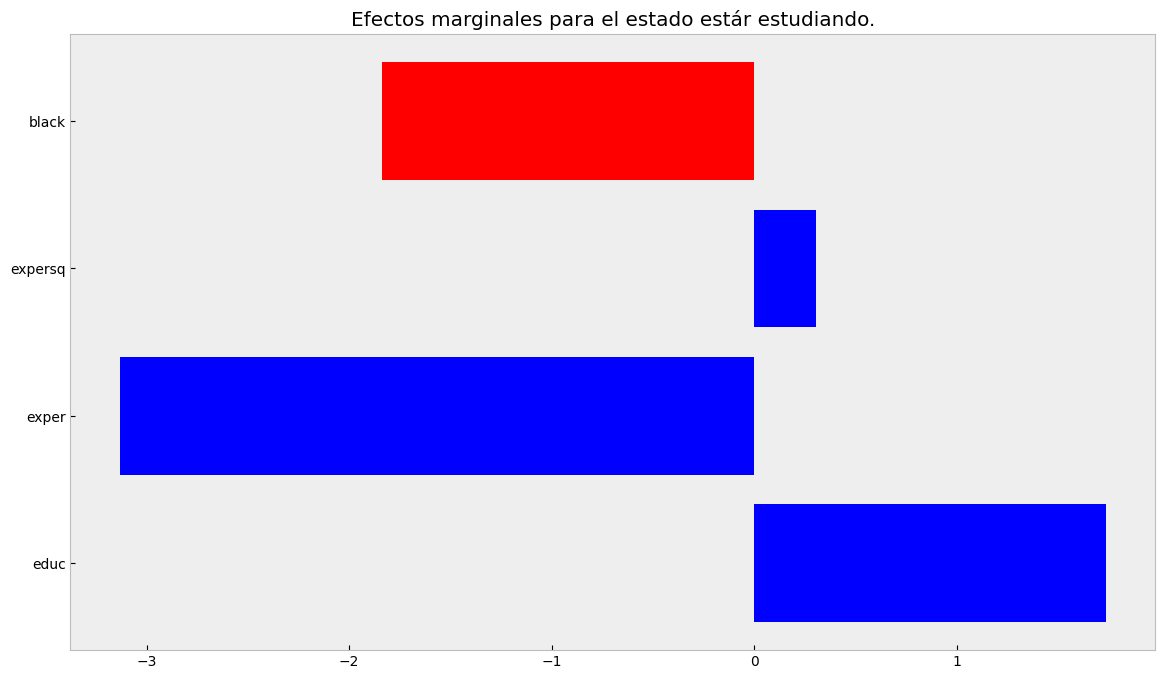

In [122]:

f, ax = plt.subplots(figsize=(14, 8))
plt.title('Efectos marginales para el estado estár estudiando.')
pwu = df_res['dy/dx']*100
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=labels)
plt.grid()
plt.show()

In [123]:
df_res = margeff.summary_frame().iloc[4:8,:]
df_res.head()

dy/dx  Std. Err.          z      Pr(>|z|)  \
endog    exog                                                    
estado=1 educ    -0.042947   0.003001 -14.312466  1.829105e-46   
         exper   -0.100613   0.009648 -10.428663  1.834507e-25   
         expersq  0.006666   0.001386   4.811209  1.500200e-06   
         black    0.058979   0.016445   3.586518  3.351224e-04   

                  Conf. Int. Low  Cont. Int. Hi.  
endog    exog                                     
estado=1 educ          -0.048828       -0.037066  
         exper         -0.119522       -0.081704  
         expersq        0.003951        0.009382  
         black          0.026748        0.091210

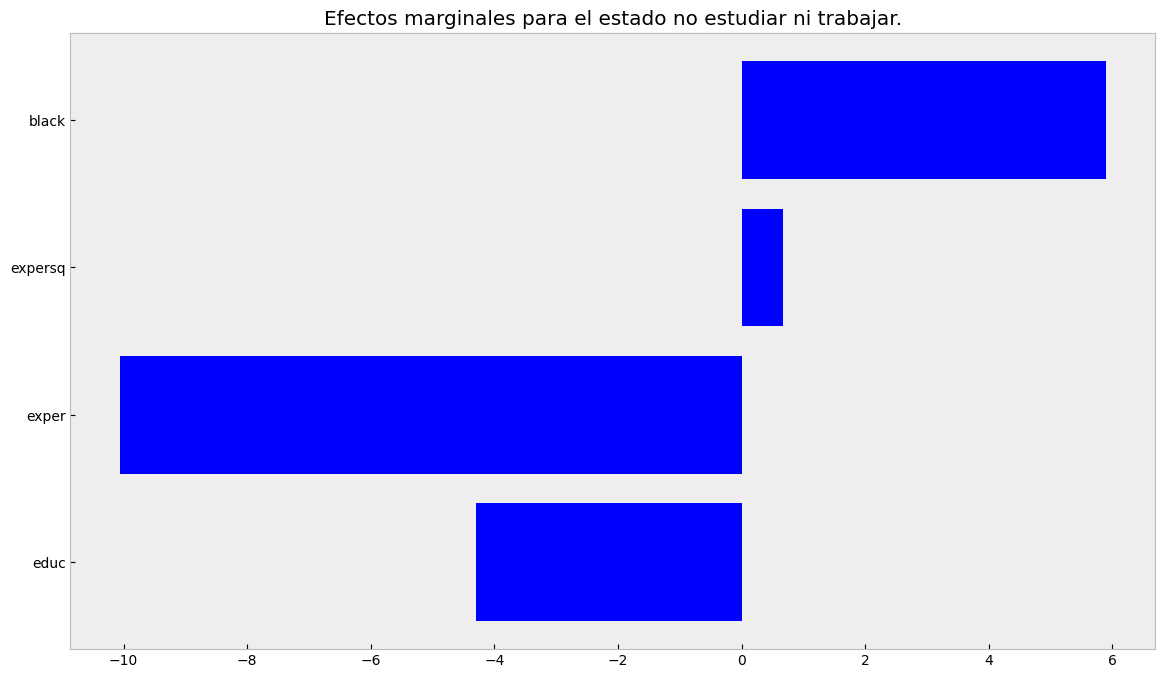

In [124]:
temp = df_res['Pr(>|z|)'] < 0.05
df_res['c'] = ['blue' if x else 'red' for x in temp]
df_res.head()
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Efectos marginales para el estado no estudiar ni trabajar.')
pwu = df_res['dy/dx']*100
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=labels)
plt.grid()
plt.show()

In [125]:
model = sm.MNLogit(y, X)

results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.528746
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                 estado   No. Observations:                 1717
Model:                        MNLogit   Df Residuals:                     1707
Method:                           MLE   Df Model:                            8
Date:                Thu, 22 Aug 2024   Pseudo R-squ.:                  0.2433
Time:                        03:52:40   Log-Likelihood:                -907.86
converged:                       True   LL-Null:                       -1199.7
Covariance Type:            nonrobust   LLR p-value:                7.383e-121
  estado=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2779      1.133      9.069      0.000       8.057      12.499
educ          -0.6736      0.

In [126]:
margeff = results.get_margeff()

In [127]:
print(margeff.summary())

       MNLogit Marginal Effects      
Dep. Variable:                 estado
Method:                          dydx
At:                           overall
  estado=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.0174      0.003      5.981      0.000       0.012       0.023
exper         -0.0313      0.007     -4.629      0.000      -0.045      -0.018
expersq        0.0030      0.001      2.937      0.003       0.001       0.005
black         -0.0184      0.013     -1.435      0.151      -0.043       0.007
------------------------------------------------------------------------------
  estado=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ          -0.0429      0.003    -14.312      0.000      -0.049      -0.037
exper         -0.1006      0.010    -10.429      0.000    

In [128]:
margeff.summary_frame()

dy/dx  Std. Err.          z      Pr(>|z|)  \
endog    exog                                                    
estado=0 educ     0.017379   0.002906   5.980823  2.220128e-09   
         exper   -0.031319   0.006766  -4.628583  3.681771e-06   
         expersq  0.003032   0.001032   2.937497  3.308738e-03   
         black   -0.018381   0.012808  -1.435133  1.512491e-01   
estado=1 educ    -0.042947   0.003001 -14.312466  1.829105e-46   
         exper   -0.100613   0.009648 -10.428663  1.834507e-25   
         expersq  0.006666   0.001386   4.811209  1.500200e-06   
         black    0.058979   0.016445   3.586518  3.351224e-04   
estado=2 educ     0.025569   0.004074   6.276111  3.471462e-10   
         exper    0.131932   0.010703  12.326930  6.487185e-35   
         expersq -0.009698   0.001584  -6.121966  9.242789e-10   
         black   -0.040598   0.019736  -2.057090  3.967760e-02   

                  Conf. Int. Low  Cont. Int. Hi.  
endog    exog                                     
estado=0 educ           0.011683        0.023074  
         exper         -0.044581       -0.018057  
         expersq        0.001009        0.005055  
         black         -0.043484        0.006722  
estado=1 educ          -0.048828       -0.037066  
         exper         -0.119522       -0.081704  
         expersq        0.003951        0.009382  
         black          0.026748        0.091210  
estado=2 educ           0.017584        0.033553  
         exper          0.110955        0.152909  
         expersq       -0.012803       -0.006593  
         black         -0.079279       -0.001917

In [129]:
df_res = margeff.summary_frame().iloc[8:, :]
df_res.head()

dy/dx  Std. Err.          z      Pr(>|z|)  \
endog    exog                                                    
estado=2 educ     0.025569   0.004074   6.276111  3.471462e-10   
         exper    0.131932   0.010703  12.326930  6.487185e-35   
         expersq -0.009698   0.001584  -6.121966  9.242789e-10   
         black   -0.040598   0.019736  -2.057090  3.967760e-02   

                  Conf. Int. Low  Cont. Int. Hi.  
endog    exog                                     
estado=2 educ           0.017584        0.033553  
         exper          0.110955        0.152909  
         expersq       -0.012803       -0.006593  
         black         -0.079279       -0.001917

In [130]:
temp = df_res['Pr(>|z|)'] < 0.05
temp

endog     exog   
estado=2  educ       True
          exper      True
          expersq    True
          black      True
Name: Pr(>|z|), dtype: bool

In [131]:
l = []
for i in temp.values:
  if i==True:
    l.append('blue')
  else:
    l.append('red')
l

['blue', 'blue', 'blue', 'blue']

In [132]:
['blue' if x else 'red' for x in temp]

['blue', 'blue', 'blue', 'blue']

In [133]:
df_res['c'] = ['blue' if x else 'red' for x in temp]
df_res.head()

dy/dx  Std. Err.          z      Pr(>|z|)  \
endog    exog                                                    
estado=2 educ     0.025569   0.004074   6.276111  3.471462e-10   
         exper    0.131932   0.010703  12.326930  6.487185e-35   
         expersq -0.009698   0.001584  -6.121966  9.242789e-10   
         black   -0.040598   0.019736  -2.057090  3.967760e-02   

                  Conf. Int. Low  Cont. Int. Hi.     c  
endog    exog                                           
estado=2 educ           0.017584        0.033553  blue  
         exper          0.110955        0.152909  blue  
         expersq       -0.012803       -0.006593  blue  
         black         -0.079279       -0.001917  blue

In [134]:
np.arange(len(pwu))

array([0, 1, 2, 3])

In [135]:
for idx in df_res.index:
  print(idx[1])

educ
exper
expersq
black


In [136]:
labels = [l[1] for l in df_res.index]

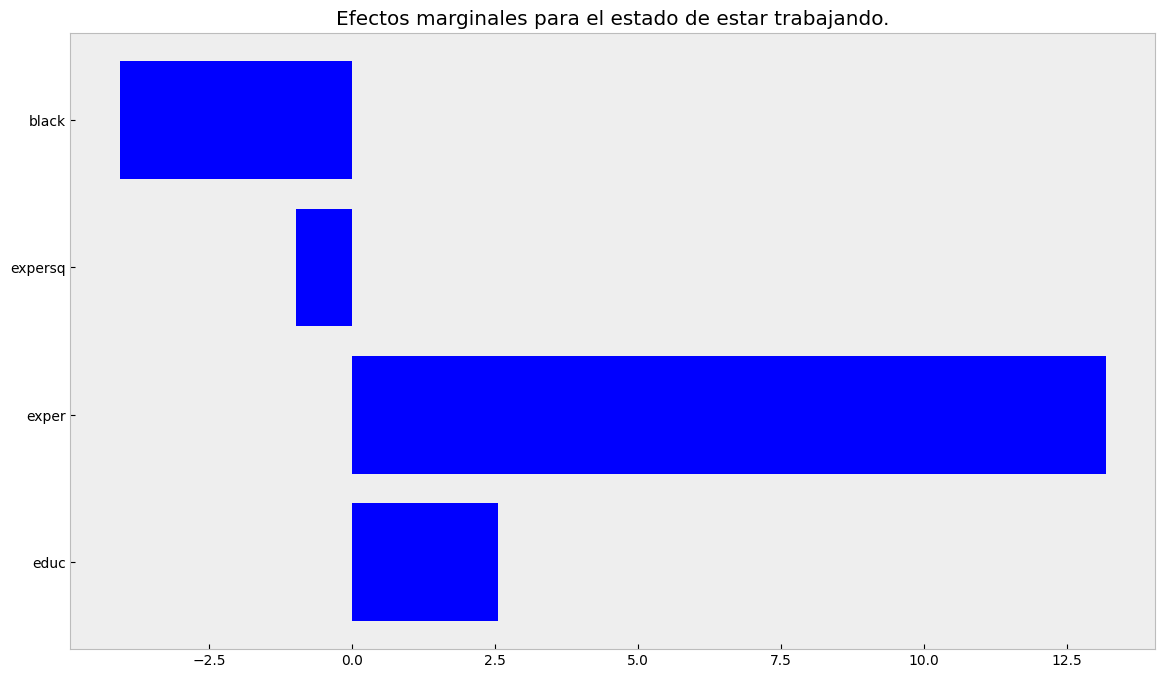

In [137]:
temp = df_res['Pr(>|z|)'] < 0.05
df_res['c'] = ['blue' if x else 'red' for x in temp]


f, ax = plt.subplots(figsize=(14, 8))
plt.title('Efectos marginales para el estado de estar trabajando.')
pwu = df_res['dy/dx']*100
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=labels)
plt.grid()
plt.show()

Trabajar, ni estudiar ni trabar, trabajar

**Regresión logística ordinal**

$$ P(y_i=j)  = \Lambda (\alpha_{j+1} - X_{i}\beta) - \Lambda (\alpha_{j} - X_{i}\beta)$$

Donde $\Lambda$ es la función (de densidad) sigmoide o logística; $j$, es la clase.

Veamos un ejemplo.

In [139]:
import pandas as pd
ordinal = pd.read_csv('logit_ordinal.csv')
ordinal.head()

,revenue_year,Cat Rev Year,Price,year,mes,positive_year,negative_year,Followers_year,Reviews_year,Score,...,Anime,Building,Turn-Based,Tactical,Management,Psychological,Visual Novel,Psychological Horror,Moddable,Crafting
0,2.429522e+08,4. Más de 20M,29.99,2017,12,274967,230072,808119,420688,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.558367e+07,4. Más de 20M,29.99,2015,4,155068,31577,373928,165962,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.300000e+08,4. Más de 20M,59.99,2020,12,322750,104002,1175264,373772,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.198686e+08,4. Más de 20M,39.99,2018,2,169270,26417,254881,154448,9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6.077858e+07,4. Más de 20M,39.99,2015,5,0,0,128546,79944,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
set(ordinal['Cat Rev Year'])

{'1. Menos de 1M',
 '2. Más de 1M y menos de 5M',
 '3. Más de 5M y menos de 20M',
 '4. Más de 20M'}

Esta es una base de datos que trabajó el Dr. Benjamin Oliva Vazquez de la facultad de Economía de la UNAM. La base recolectada tenía el objetivo de recabar información para estimar la probabilidad de éxito de videojuegos de una *Startup*.

En los vídeojuegos hay ciertos tags que hace que los videojuegos sean éxitosos.

¿Cuál es la probabilidad de éxito de un videojuego? Depende de la definición de éxito: videojuegos generan ingresos anuales de entre 5 y 20 millones USD

¿Cuáles son los determinantes de los ingresos? En la industria, los ingresos dependen de las calificaciones de los videojuegos, los comentarios positivos, el número de seguidores en redes sociales y el tipo de tags que les asignan los usuarios

In [141]:
ordinal.columns = [c.replace(' ', '_').replace('.', '_').replace('-', '_').lower() for c in ordinal.columns]

ordinal.head()

,revenue_year,cat_rev_year,price,year,mes,positive_year,negative_year,followers_year,reviews_year,score,...,anime,building,turn_based,tactical,management,psychological,visual_novel,psychological_horror,moddable,crafting
0,2.429522e+08,4. Más de 20M,29.99,2017,12,274967,230072,808119,420688,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.558367e+07,4. Más de 20M,29.99,2015,4,155068,31577,373928,165962,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.300000e+08,4. Más de 20M,59.99,2020,12,322750,104002,1175264,373772,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.198686e+08,4. Más de 20M,39.99,2018,2,169270,26417,254881,154448,9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6.077858e+07,4. Más de 20M,39.99,2015,5,0,0,128546,79944,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
categories = [
    '1. Menos de 1M',
    '2. Más de 1M y menos de 5M',
    '3. Más de 5M y menos de 20M',
    '4. Más de 20M'
]

# Convertir la columna 'cat_rev_year' a tipo categórico con el orden específico
ordinal['cat_rev_year'] = pd.Categorical(ordinal['cat_rev_year'], categories=categories, ordered=True)


In [143]:
ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20231 entries, 0 to 20230
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   revenue_year             20231 non-null  float64 
 1   cat_rev_year             20231 non-null  category
 2   price                    20231 non-null  float64 
 3   year                     20231 non-null  int64   
 4   mes                      20231 non-null  int64   
 5   positive_year            20231 non-null  int64   
 6   negative_year            20231 non-null  int64   
 7   followers_year           20231 non-null  int64   
 8   reviews_year             20231 non-null  int64   
 9   score                    20231 non-null  int64   
 10  adventure                20231 non-null  int64   
 11  singleplayer             20231 non-null  int64   
 12  story_rich               20231 non-null  int64   
 13  horror                   20231 non-null  int64   
 14  3d    

In [144]:
# Inicializar 'positive_n' con valor 0
ordinal['positive_n'] = 0

# Asignar valores basados en 'positive_year'
ordinal.loc[ordinal['positive_year'] <= 4, 'positive_n'] = 1
ordinal.loc[(ordinal['positive_year'] > 4) & (ordinal['positive_year'] <= 60), 'positive_n'] = 2
ordinal.loc[ordinal['positive_year'] > 60, 'positive_n'] = 3

# Convertir 'positive_n' a tipo categórico
ordinal['positive_n'] = pd.Categorical(ordinal['positive_n'])

In [145]:
# Inicializar 'Followers_n' con valor 0
ordinal['followers_n'] = 0

# Asignar valores basados en 'Followers_year'
ordinal.loc[ordinal['followers_year'] <= 50, 'followers_n'] = 1
ordinal.loc[(ordinal['followers_year'] > 50) & (ordinal['followers_year'] <= 500), 'followers_n'] = 2
ordinal.loc[ordinal['followers_year'] > 500, 'followers_n'] = 3

# Convertir 'Followers_n' a tipo categórico
ordinal['followers_n'] = pd.Categorical(ordinal['followers_n'])


In [146]:
# Contar los valores de 'Followers_n'
counts_followers_n = ordinal['followers_n'].value_counts()
print(counts_followers_n)


followers_n
2    8886
3    7667
1    3678
Name: count, dtype: int64


In [147]:
ordinal.describe()

,revenue_year,price,year,mes,positive_year,negative_year,followers_year,reviews_year,score,adventure,...,anime,building,turn_based,tactical,management,psychological,visual_novel,psychological_horror,moddable,crafting
count,2.023100e+04,20231.000000,20231.000000,20231.0000,2.023100e+04,20231.000000,2.023100e+04,20231.000000,20231.000000,20231.000000,...,20230.000000,20230.000000,20230.000000,20230.000000,20230.000000,20230.000000,20230.000000,20230.000000,20230.000000,20230.000000
mean,3.447218e+05,12.698464,2016.510108,6.5498,1.517632e+03,254.426227,3.284577e+03,667.329692,7.359696,0.492067,...,0.147355,0.060356,0.083490,0.055116,0.079684,0.068413,0.088828,0.062086,0.019575,0.034157
std,4.653088e+06,13.284328,4.369408,3.4216,2.796218e+04,5365.553958,1.957087e+04,6789.193630,1.910808,0.499949,...,0.354469,0.238151,0.276628,0.228213,0.270809,0.252460,0.284503,0.241318,0.138538,0.181637
min,4.665764e+01,0.500000,1983.000000,1.0000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.424756e+03,4.990000,2015.000000,4.0000,6.000000e+00,2.000000,7.700000e+01,10.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.552154e+03,9.990000,2017.000000,7.0000,2.400000e+01,6.000000,2.650000e+02,30.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.600000e+04,14.990000,2019.000000,10.0000,1.020000e+02,23.000000,1.119000e+03,124.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.300000e+08,999.000000,2021.000000,12.0000,1.289436e+06,244580.000000,1.175264e+06,420688.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Balanceo de los datos.

In [148]:
counts = ordinal['cat_rev_year'].value_counts()
counts

,count
cat_rev_year,
1. Menos de 1M,19516
2. Más de 1M y menos de 5M,492
3. Más de 5M y menos de 20M,162
4. Más de 20M,61


<ipython-input-149-209b181f4b60>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v + 0.5, f"{percentages[i]:.1f}%", ha='center', va='bottom', fontsize=10)


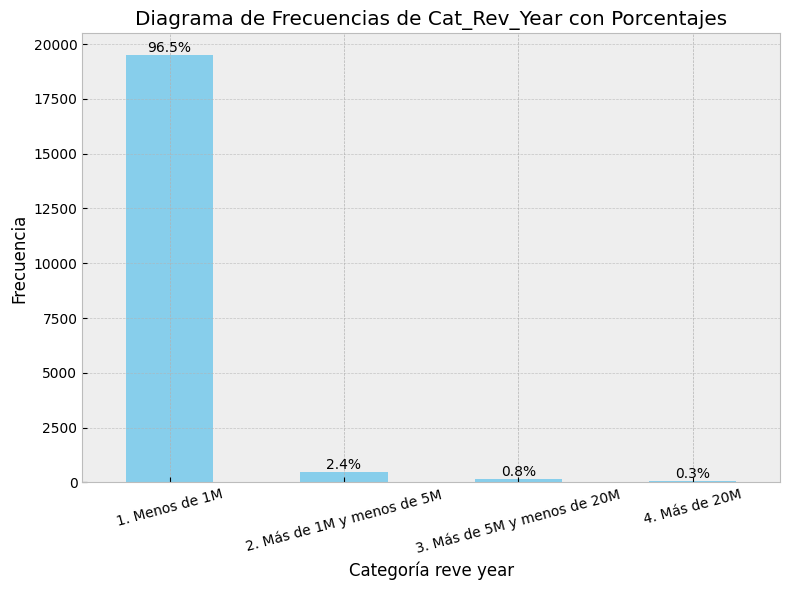

In [149]:
import matplotlib.pyplot as plt

counts = counts.sort_index()

# Calcular los porcentajes
percentages = (counts / len(ordinal)) * 100

# Crear el gráfico de barras

plt.figure(figsize=(8, 6))
bars = counts.plot(kind='bar', color='skyblue')

# Agregar los porcentajes sobre las barras
for i, v in enumerate(counts):
  plt.text(i, v + 0.5, f"{percentages[i]:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title('Diagrama de Frecuencias de Cat_Rev_Year con Porcentajes')
plt.xlabel('Categoría reve year')
plt.ylabel('Frecuencia')
plt.xticks(rotation=15)  # Rotar etiquetas del eje x si es necesario
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y
plt.tight_layout()
plt.show()

Hacer el rebalanceo

In [150]:
cat_rev_year = sorted(list(set(ordinal['cat_rev_year'])))
cat_rev_year

['1. Menos de 1M',
 '2. Más de 1M y menos de 5M',
 '3. Más de 5M y menos de 20M',
 '4. Más de 20M']

In [151]:
temp_df = ordinal.groupby('cat_rev_year')
for c in cat_rev_year:
  print(c)

1. Menos de 1M
2. Más de 1M y menos de 5M
3. Más de 5M y menos de 20M
4. Más de 20M


<ipython-input-151-54636daabbb2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = ordinal.groupby('cat_rev_year')


In [152]:
c

'4. Más de 20M'

In [153]:
temp_df = ordinal.groupby('cat_rev_year')
dfs_list = []
for c in cat_rev_year:
  df_t = temp_df.get_group(c)
  dfs_list.append(df_t)
# dfs_list

<ipython-input-153-fbca25dde1a7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = ordinal.groupby('cat_rev_year')


In [154]:
len(dfs_list[0])

19516

In [155]:
n = 1700 # este número de muestras lo determinaron los autores de acuerdo a su experiencia.
sample_df_c1 = dfs_list[0].sample(n=n, random_state=1, replace=False)
sample_df_c1.head()

,revenue_year,cat_rev_year,price,year,mes,positive_year,negative_year,followers_year,reviews_year,score,...,turn_based,tactical,management,psychological,visual_novel,psychological_horror,moddable,crafting,positive_n,followers_n
2148,139525.993900,1. Menos de 1M,2.99,2017,11,2461,86,3612,2418,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
5595,51914.660830,1. Menos de 1M,5.99,2020,3,428,125,1563,452,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
17753,666.544923,1. Menos de 1M,2.99,2017,9,0,0,132,12,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
12295,7800.000000,1. Menos de 1M,7.99,2020,7,53,2,58,51,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2414,400000.000000,1. Menos de 1M,24.99,2021,4,842,121,19779,834,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,3


Junto los DF

In [156]:
del dfs_list[0]
dfs_list.append(sample_df_c1)

In [157]:
new_df = pd.concat(dfs_list )
display(new_df.head())
len(new_df), len(ordinal)

,revenue_year,cat_rev_year,price,year,mes,positive_year,negative_year,followers_year,reviews_year,score,...,turn_based,tactical,management,psychological,visual_novel,psychological_horror,moddable,crafting,positive_n,followers_n
85,3463503.650,2. Más de 1M y menos de 5M,19.99,2010,3,11383,267,0,9040,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1
107,4461420.932,2. Más de 1M y menos de 5M,19.99,2014,4,0,0,54823,11775,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
122,3426081.126,2. Más de 1M y menos de 5M,19.99,2013,4,10523,487,22784,8985,10,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3,3
128,4763170.614,2. Más de 1M y menos de 5M,29.99,2015,10,9209,927,33963,8168,9,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3,3
129,4833251.594,2. Más de 1M y menos de 5M,19.99,2015,11,0,0,53911,12691,9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3


(2415, 20231)

In [158]:
del dfs_list

<ipython-input-159-bd81930181be>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v + 0.5, f"{percentages[i]:.1f}%", ha='center', va='bottom', fontsize=10)


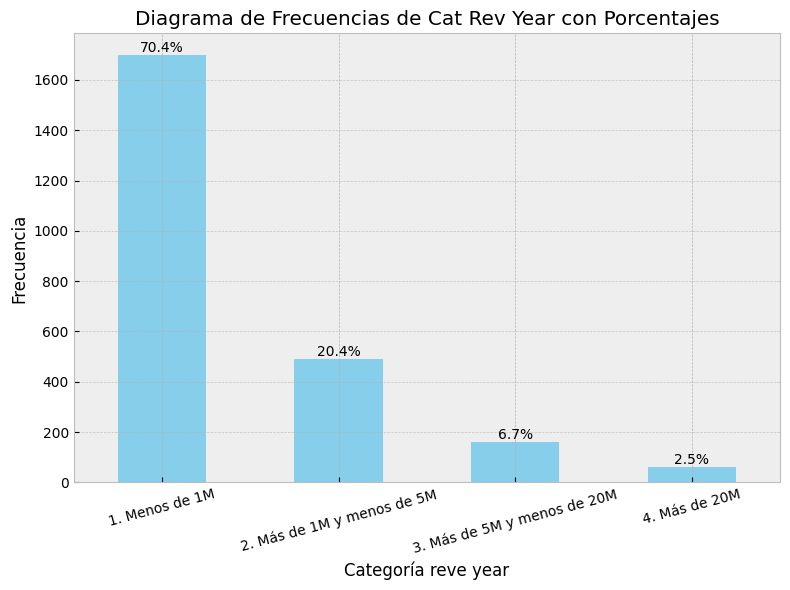

In [159]:
counts = new_df['cat_rev_year'].value_counts()
counts = counts.sort_index()

# Calcular los porcentajes
percentages = (counts / len(new_df)) * 100

# Crear el gráfico de barras

plt.figure(figsize=(8, 6))
bars = counts.plot(kind='bar', color='skyblue')

# Agregar los porcentajes sobre las barras
for i, v in enumerate(counts):
  plt.text(i, v + 0.5, f"{percentages[i]:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title('Diagrama de Frecuencias de Cat Rev Year con Porcentajes')
plt.xlabel('Categoría reve year')
plt.ylabel('Frecuencia')
plt.xticks(rotation=15)  # Rotar etiquetas del eje x si es necesario
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula en el eje y
plt.tight_layout()
plt.show()

In [160]:
x_columns = [
    'price',
    'score',
    'followers_n',
    'positive_n',
    'adventure',
    'singleplayer',
    'story_rich',
    'horror',
    '3d',
    'survival',
    'choices_matter',
    'historical',
    'mystery',
    'replay_value',
    'early_access',
    'female_protagonist',
    'lovecraftian',
    'open_world',
    'multiplayer',
    'co_op',
    'indie',
    'atmospheric',
    'violent',
    'online_co_op',
    'third_person',
    'sandbox',
    'strategy',
    'difficult',
    'gore',
    'soundtrack',
    'great_soundtrack',
    'simulation',
    'rpg',
    'character_customization',
    'funny',
    'sci_fi',
    'exploration',
    'action',
    'sexual_content'
    ]


In [161]:
new_df['action'][:100]

,action
85,1.0
107,1.0
122,1.0
128,0.0
129,1.0
...,...
283,1.0
284,1.0
285,1.0
286,1.0


In [162]:
new_df['cat_rev_year'].dtype

CategoricalDtype(categories=['1. Menos de 1M', '2. Más de 1M y menos de 5M',
                  '3. Más de 5M y menos de 20M', '4. Más de 20M'],
, ordered=True, categories_dtype=object)

Seleccionamos nuestras entradas y nuestras salidas

In [163]:
X = new_df[x_columns]
y = new_df['cat_rev_year']
type(y)

pandas.core.series.Series

In [164]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2415 entries, 85 to 9198
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   price                    2415 non-null   float64 
 1   score                    2415 non-null   int64   
 2   followers_n              2415 non-null   category
 3   positive_n               2415 non-null   category
 4   adventure                2415 non-null   int64   
 5   singleplayer             2415 non-null   int64   
 6   story_rich               2415 non-null   int64   
 7   horror                   2415 non-null   int64   
 8   3d                       2415 non-null   float64 
 9   survival                 2415 non-null   float64 
 10  choices_matter           2415 non-null   float64 
 11  historical               2415 non-null   float64 
 12  mystery                  2415 non-null   float64 
 13  replay_value             2415 non-null   float64 
 14  early_access

In [165]:
X['followers_n'] = X['followers_n'].values.codes
X['positive_n'] = X['positive_n'].values.codes
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2415 entries, 85 to 9198
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    2415 non-null   float64
 1   score                    2415 non-null   int64  
 2   followers_n              2415 non-null   int8   
 3   positive_n               2415 non-null   int8   
 4   adventure                2415 non-null   int64  
 5   singleplayer             2415 non-null   int64  
 6   story_rich               2415 non-null   int64  
 7   horror                   2415 non-null   int64  
 8   3d                       2415 non-null   float64
 9   survival                 2415 non-null   float64
 10  choices_matter           2415 non-null   float64
 11  historical               2415 non-null   float64
 12  mystery                  2415 non-null   float64
 13  replay_value             2415 non-null   float64
 14  early_access             241

<ipython-input-165-1e536747f6bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['followers_n'] = X['followers_n'].values.codes
<ipython-input-165-1e536747f6bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['positive_n'] = X['positive_n'].values.codes


Ajustamos nuestro modelo

In [166]:
import numpy as np
import scipy.stats as stats

from statsmodels.miscmodels.ordinal_model import OrderedModel

In [167]:
model = OrderedModel(y, X, distr='logit')

results = model.fit(method='bfgs', disp=False)
print(results.summary())

                             OrderedModel Results                             
Dep. Variable:           cat_rev_year   Log-Likelihood:                -1088.1
Model:                   OrderedModel   AIC:                             2260.
Method:            Maximum Likelihood   BIC:                             2503.
Date:                Thu, 22 Aug 2024                                         
Time:                        04:02:10                                         
No. Observations:                2415                                         
Df Residuals:                    2373                                         
Df Model:                          39                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
price                                      

Umbrales

In [168]:
num_of_thresholds = 3
model.transform_threshold_params(results.params[-num_of_thresholds:])


array([       -inf, 12.53059026, 15.51312715, 17.48043271,         inf])

Predicción

In [169]:
X.iloc[0,:]

,85
price,19.99
score,10.00
followers_n,0.00
positive_n,2.00
adventure,1.00
singleplayer,1.00
story_rich,0.00
horror,0.00
3d,0.00
survival,0.00


In [172]:
y_pred.values.argmax(0)[0] + 1

1

In [171]:
y_pred = results.predict(X.iloc[0,:])
print("Probabilidades predichas")
display(y_pred)
print(f"Suma de probabilidades: {y_pred.values.sum()}")

print(f"La clase a la que pertenece la probabilidad más alta: {y_pred.values.argmax(1)[0]+1}")


Probabilidades predichas


,0,1,2,3
None,0.264194,0.61215,0.104307,0.019349


Suma de probabilidades: 1.0
La clase a la que pertenece la probabilidad más alta: 2


Guardar datos transformados.

In [173]:
new_df.to_csv('logit_ordinal_data.csv', index=False)

Optimizar el modelo.

Para ello usaremos PSO.
 - Documentación: https://pyswarms.readthedocs.io/en/latest/installation.html

Explicar teoríade PSO.


In [174]:
! pip install pyswarms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 1.8 MB/s eta 0:00:00


Ejemplo:

In [175]:
# Import modules
import numpy as np

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [176]:
%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2024-08-22 04:04:18,054 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=3.32e-44
2024-08-22 04:04:26,727 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.3191608047416614e-44, best pos: [-1.79869597e-22 -2.89574865e-23]


CPU times: user 2.52 s, sys: 144 ms, total: 2.66 s
Wall time: 8.71 s


In [177]:
cost, pos

(3.3191608047416614e-44, array([-1.79869597e-22, -2.89574865e-23]))

In [178]:
def esfera(x1, x2):
  return x1**2 + x2**2

esfera(1.58945819e-22,  6.52309895e-22)

4.507719724924917e-43

In [179]:
X.describe()

,price,score,followers_n,positive_n,adventure,singleplayer,story_rich,horror,3d,survival,...,soundtrack,great_soundtrack,simulation,rpg,character_customization,funny,sci_fi,exploration,action,sexual_content
count,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,...,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000
mean,17.893226,7.743271,1.402070,1.293168,0.530435,0.598344,0.231884,0.150725,0.080331,0.138302,...,0.230642,0.226501,0.279503,0.277019,0.064596,0.144513,0.129193,0.129193,0.539545,0.090269
std,15.176966,1.829613,0.714563,0.761120,0.499176,0.490335,0.422123,0.357854,0.271862,0.345288,...,0.421331,0.418654,0.448848,0.447618,0.245863,0.351682,0.335482,0.335482,0.498537,0.286626
min,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.990000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.990000,8.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,19.990000,9.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,199.990000,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
X.price.max(), X.price.min()

(199.99, 0.5)

In [181]:
X.describe().iloc[3, :].values

array([0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [182]:
min_bound = X.describe().iloc[3, :].values
max_bound = X.describe().iloc[-1, :].values
max_bound[0] = 199.9
min_bound, max_bound

(array([0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]),
 array([199.9,  10. ,   2. ,   2. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ]))

In [183]:
X.shape

(2415, 39)

In [184]:
39*20

780

In [185]:
bounds = (min_bound, max_bound)

In [186]:
def sphere(x):
    """Sphere objective function.

    Has a global minimum at :code:`0` and with a search domain of
        :code:`[-inf, inf]`

    Parameters
    ----------
    x : numpy.ndarray
        set of inputs of shape :code:`(n_particles, dimensions)`

    Returns
    -------
    numpy.ndarray
        computed cost of size :code:`(n_particles, )`
    """
    j = (x ** 2.0).sum(axis=1)

    return j

In [187]:
import numpy as np
np.random.seed(100)


In [188]:
print(y_pred)
print(y_pred.values[-1][-1])

             0        1         2         3
None  0.264194  0.61215  0.104307  0.019349
0.019349295519312415


In [189]:
def objective_f(x):
  x[:, 2:] = x[:, 2:].round()
  r = results.predict(x)[:, -1]
  return 1/r # 1 - r


options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}


optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=39, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(objective_f, iters=1000)


2024-08-22 04:11:09,448 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=1
2024-08-22 04:11:14,218 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0000001182875493, best pos: [192.88821679   9.13413352   2.           1.           1.
   0.           0.           0.           0.           1.
   0.           1.           0.           1.           0.
   0.           1.           1.           1.           1.
   0.           0.           0.           1.           1.
   1.           1.           0.           1.           1.
   0.           1.           1.           1.           0.
   1.           0.           1.           0.        ]


In [190]:
cost, pos

(1.0000001182875493,
 array([192.88821679,   9.13413352,   2.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   0.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   0.        ]))

In [191]:
pos.shape, len(x_columns)

((39,), 39)

In [192]:
r = pd.DataFrame(pos.reshape(1, -1), columns=x_columns)
r.head()

,price,score,followers_n,positive_n,adventure,singleplayer,story_rich,horror,3d,survival,...,soundtrack,great_soundtrack,simulation,rpg,character_customization,funny,sci_fi,exploration,action,sexual_content
0,192.888217,9.134134,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [193]:
max_len = max(len(c) for c in x_columns)

for p, c in zip(pos, x_columns):
  num_spaces = max_len - len(c)
  print(f"{c: <{max_len}} : {p:.4f}")

price                   : 192.8882
score                   : 9.1341
followers_n             : 2.0000
positive_n              : 1.0000
adventure               : 1.0000
singleplayer            : 0.0000
story_rich              : 0.0000
horror                  : 0.0000
3d                      : 0.0000
survival                : 1.0000
choices_matter          : 0.0000
historical              : 1.0000
mystery                 : 0.0000
replay_value            : 1.0000
early_access            : 0.0000
female_protagonist      : 0.0000
lovecraftian            : 1.0000
open_world              : 1.0000
multiplayer             : 1.0000
co_op                   : 1.0000
indie                   : 0.0000
atmospheric             : 0.0000
violent                 : 0.0000
online_co_op            : 1.0000
third_person            : 1.0000
sandbox                 : 1.0000
strategy                : 1.0000
difficult               : 0.0000
gore                    : 1.0000
soundtrack              : 1.0000
great_so

In [194]:
pos[2:] = np.round(pos[2:])
pos

array([192.88821679,   9.13413352,   2.        ,   1.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.        ,   0.        ,   1.        ,
         0.        ,   1.        ,   0.        ,   0.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         0.        ,   0.        ,   0.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   0.        ,
         1.        ,   1.        ,   0.        ,   1.        ,
         1.        ,   1.        ,   0.        ,   1.        ,
         0.        ,   1.        ,   0.        ])

In [195]:
results.predict(pos)

array([[8.38011103e-10, 1.57025059e-08, 1.01747018e-07, 9.99999882e-01]])

In [196]:
9.99999222e-01 *100

99.9999222

Lo siguiente es de como utilizar R en python para haceer una regresión logistica ordinal. En esta versión no se profundizará pero se dejerá para que el estudiante puede explorar esaoción.

La ventaja de usar R para la regresión logistica ordinal, esque podemos sacar los efectos marginales, opción que no esta disponible en python con `statsmodels`.

# Versión con R

In [197]:
! pip install --upgrade rpy2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rpy2: filename=rpy2-3.5.16-cp310-cp310-linux_x86_64.whl size=329855 sha256=320fda54fa2316e21a600afa20c88e41bc29adc6ed67be842629ffcfbc44dde8
  Stored in directory: /root/.cache/pip/wheels/86/9b/1a/c09b2935ab01605117b270e2abb744a10f5b213c6f9b7213ce
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [198]:
import rpy2

print(rpy2.__version__)


3.5.16


In [199]:
import pandas as pd
pd_df = pd.read_csv('logit_ordinal_data.csv')
pd_df.head()

,revenue_year,cat_rev_year,price,year,mes,positive_year,negative_year,followers_year,reviews_year,score,...,turn_based,tactical,management,psychological,visual_novel,psychological_horror,moddable,crafting,positive_n,followers_n
0,3463503.650,2. Más de 1M y menos de 5M,19.99,2010,3,11383,267,0,9040,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1
1,4461420.932,2. Más de 1M y menos de 5M,19.99,2014,4,0,0,54823,11775,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
2,3426081.126,2. Más de 1M y menos de 5M,19.99,2013,4,10523,487,22784,8985,10,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3,3
3,4763170.614,2. Más de 1M y menos de 5M,29.99,2015,10,9209,927,33963,8168,9,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3,3
4,4833251.594,2. Más de 1M y menos de 5M,19.99,2015,11,0,0,53911,12691,9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,3


In [200]:
type(pd_df['positive_n'][0])

numpy.int64

In [206]:
type(pd_df['followers_n'][0])
pd_df['followers_n'] = pd_df['followers_n'].astype('category')

In [207]:
from functools import partial
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

In [208]:
from rpy2.robjects import r, pandas2ri

url = 'logit_ordinal_data.csv'

# Ejecutar el comando de R para cargar datos CSV
dataf = r(f'read.csv("{url}")')

NotImplementedError: 
    Conversion rules for `rpy2.robjects` appear to be missing. Those
    rules are in a Python `contextvars.ContextVar`. This could be caused
    by multithreading code not passing context to the thread.
    Check rpy2's documentation about conversions.
    

In [204]:
type(dataf)

NameError: name 'dataf' is not defined

In [205]:
from rpy2.robjects.packages import importr
MASS = importr('MASS')

NotImplementedError: 
    Conversion rules for `rpy2.robjects` appear to be missing. Those
    rules are in a Python `contextvars.ContextVar`. This could be caused
    by multithreading code not passing context to the thread.
    Check rpy2's documentation about conversions.
    

In [ ]:
orden_categorias = list(set(pd_df['cat_rev_year']))
orden_categorias.sort()
orden_categorias

In [ ]:
from rpy2.robjects import r, pandas2ri

# Convertir 'cat_rev_year' a factor ordenado con niveles específicos en R
r.assign('dataf$cat_rev_year', r.factor(dataf.rx2('cat_rev_year'), levels=orden_categorias, ordered=True))

In [ ]:
r.assign('dataf$cat_rev_year', r.factor(dataf.rx2('cat_rev_year')))


In [ ]:
x_columns = [
    'price',
    'score',
    'followers_n',
    'positive_n',
    'adventure',
    'singleplayer',
    'story_rich',
    'horror',
    'X3d',
    'survival',
    'choices_matter',
    'historical',
    'mystery',
    'replay_value',
    'early_access',
    'female_protagonist',
    'lovecraftian',
    'open_world',
    'multiplayer',
    'co_op',
    'indie',
    'atmospheric',
    'violent',
    'online_co_op',
    'third_person',
    'sandbox',
    'strategy',
    'difficult',
    'gore',
    'soundtrack',
    'great_soundtrack',
    'simulation',
    'rpg',
    'character_customization',
    'funny',
    'sci_fi',
    'exploration',
    'action',
    'sexual_content'
    ]

In [ ]:
formula = 'cat_rev_year ~ '

formula = 'cat_rev_year ~ '
for i, v in enumerate(x_columns):
  if v != 'cat_rev_year' and i != (len(x_columns)-1):
    formula += v + ' + '
  else:
    formula += v


In [ ]:
formula

In [ ]:
colnames = dataf.colnames
for c in x_columns:
  if c in colnames:
    continue
  else:
    print(False)
    print(c)

In [ ]:
from rpy2.robjects import Formula

In [ ]:
# Asignar el dataframe a un objeto en R
r.assign('dataf', dataf)
# Obtener el dataframe 'dataf' desde R
dataf_1 = r['dataf']

# Obtener un resumen básico de los datos
summary_data = r['summary'](dataf_1)
print(summary_data)

In [ ]:
# Obtener el dataframe 'dataf_1' desde R
dataf_1 = r['dataf']

# Obtener información sobre los tipos de datos en el dataframe
column_types = r['sapply'](dataf_1, r['class'])

# Convertir los resultados a Python y mostrarlos
column_types_py = list(column_types)
for i, col_type in enumerate(column_types_py):
  print(f"{i}: {col_type}, {colnames[i]}")

In [ ]:
r('''dataf$cat_rev_year <- factor(dataf$cat_rev_year)''')

In [ ]:
from rpy2.robjects import r

# Verificar el tipo de clase de 'cat_rev_year' antes de la conversión
r('''print(class(dataf$cat_rev_year))''')


In [ ]:
r("""
dataf$cat_rev_year <- factor(dataf$cat_rev_year, order = TRUE,
                                      levels =c("1. Menos de 1M",
                                                "2. Más de 1M y menos de 5M",
                                                "3. Más de 5M y menos de 20M",
                                                "4. Más de 20M"))
""")

In [ ]:
r('''print(class(dataf$cat_rev_year))''')

In [ ]:
url = 'logit_ordinal.csv'

# Ejecutar el comando de R para cargar datos CSV
Datos = r(f'read.csv("{url}")')

r.assign('Datos', Data)

In [ ]:
r("""
Datos$Cat.Rev.Year <- factor(Datos$Cat.Rev.Year, order = TRUE,
                                      levels =c("1. Menos de 1M",
                                                "2. Más de 1M y menos de 5M",
                                                "3. Más de 5M y menos de 20M",
                                                "4. Más de 20M"))
""")

In [ ]:
r("""
Datos$Cat.Rev.Year <- factor(Datos$Cat.Rev.Year, order = TRUE,
                                      levels =c("1. Menos de 1M",
                                                "2. Más de 1M y menos de 5M",
                                                "3. Más de 5M y menos de 20M",
                                                "4. Más de 20M"))
""")

In [ ]:
dplyr = importr('dplyr')


In [ ]:
r("""
#
Datos$positive_n <- 0
Datos$positive_n[(Datos$positive_year <= 4)] <- 1
Datos$positive_n[(Datos$positive_year > 4) & (Datos$positive_year <= 60)] <- 2
Datos$positive_n[(Datos$positive_year > 60)] <- 3
Datos$positive_n <- factor(Datos$positive_n)
#
Datos$Followers_n <- 0
Datos$Followers_n[(Datos$Followers_year <= 50)] <- 1
Datos$Followers_n[(Datos$Followers_year > 50) & (Datos$Followers_year <= 500)] <- 2
Datos$Followers_n[(Datos$Followers_year > 500)] <- 3
Datos$Followers_n <- factor(Datos$Followers_n)
#
library(dplyr)
count_positive <- count(Datos, positive_n)
count_followers <- count(Datos, Followers_n)
list(count_positive = count_positive, count_followers = count_followers)
""")

In [ ]:
tidyverse = importr('tidyverse')
knitr = importr('knitr')
foreign = importr('foreign')
ggplot2 = importr('ggplot2')
dplyr = importr('dplyr')
MASS = importr('MASS')

In [ ]:
r("""

Datos_Menos_1M <- subset(Datos, Cat.Rev.Year == "1. Menos de 1M")



""")

In [ ]:
r("""

set.seed(1234)

Datos_Menos_1M_10p <- Datos_Menos_1M[sample(nrow(Datos_Menos_1M), 1700, replace = FALSE), ]



""")

In [ ]:
r("""


Datos_Otros <- subset(Datos, Cat.Rev.Year != "1. Menos de 1M")

Datos_Subset <- rbind(Datos_Menos_1M_10p, Datos_Otros)



""")

In [ ]:
r("""

OLM_01 <- polr(Cat.Rev.Year ~ Price + Score + Followers_n + positive_n + Adventure + Singleplayer + Story.Rich + Horror + X3D + Survival + Choices.Matter + Historical + Mystery + Replay.Value + Early.Access + Female.Protagonist + Lovecraftian + Open.World + Multiplayer + Co.op + Indie + Atmospheric + Violent + Online.Co.Op + Third.Person + Sandbox + Strategy + Difficult + Gore + Soundtrack + Great.Soundtrack + Simulation + RPG + Character.Customization + Funny + Sci.fi + Exploration + Action + Sexual.Content, data = Datos_Subset, Hess = TRUE, method = "logistic")

saveRDS(OLM_01, "OLM_01_model.rds")

summary(OLM_01)
""")

In [ ]:
r("""
OLM_01_coef <- data.frame(coef(summary(OLM_01)))

OLM_01_coef$pval = round((pnorm(abs(OLM_01_coef$t.value), lower.tail = FALSE) * 2), 2)

OLM_01_coef
""")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
r('''
install.packages("stargazer")
library(stargazer)

''')
r('stargazer(OLM_01, type = "text")')

In [ ]:
OLM_01_coef = r['OLM_01_coef']
display(OLM_01_coef)

In [ ]:
r("""
install.packages("erer")
library(erer)
""")

In [ ]:
r("""
print(ocME(OLM_01, rev.dum = TRUE, digits = 5))

""")

# Referencias:


 - Unpingco, J. (2016). Python for probability, statistics, and machine learning (Vol. 1). Cham, Switzerland: Springer International Publishing.
 - ChatGPT